# Data Analysis: Gender Gap in Political Knowledge

This notebook uses the 2020 American National Election Survey (ANES) dataset to explore the persistence of the gender gap in poltical knowledge.

## Data Collection and Preparation

In [2]:
# when first running, install pyreadstat, a lib to load stata files
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 33.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import pyreadstat

# Load the Merged STATA File: ANES Time Series 2020 X Cumulative Data Series 
# note: meta will contain the STATA metadata
anes_data, meta = pyreadstat.read_dta('stata/anes_timeseries_2020_stata_20220210_merged.dta')

# Convert the dataset to a pandas DataFrame
anes_2020_df = pd.DataFrame(anes_data)

# Display the first few rows of the DataFrame
display(anes_2020_df)


,version,VCF0006,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,VCF9273,VCF9274,VCF9275,VCF9277,VCF9278,VCF9279,VCF9280,VCF9281,VCF9282,_merge
0,ANES2020TimeSeries_20220210,200015.0,401318.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,-9.0,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,3
1,ANES2020TimeSeries_20220210,200022.0,300261.0,3.0,2.0,3.0,0.0,4.0,-1.0,3.0,...,-9.0,NaN,2.0,NaN,NaN,1.0,1.0,2.0,1.0,3
2,ANES2020TimeSeries_20220210,200039.0,400181.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,-9.0,NaN,3.0,NaN,NaN,1.0,1.0,1.0,1.0,3
3,ANES2020TimeSeries_20220210,200046.0,300171.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,-9.0,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,3
4,ANES2020TimeSeries_20220210,200053.0,405145.0,3.0,2.0,3.0,1.0,-2.0,-2.0,-2.0,...,3.0,NaN,1.0,NaN,NaN,1.0,2.0,1.0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315.0,-1.0,1.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,4.0,NaN,2.0,NaN,NaN,1.0,1.0,1.0,1.0,3
8276,ANES2020TimeSeries_20220210,535360.0,-1.0,1.0,6.0,3.0,0.0,1.0,1.0,1.0,...,-9.0,NaN,3.0,NaN,NaN,1.0,2.0,2.0,1.0,3
8277,ANES2020TimeSeries_20220210,535414.0,-1.0,2.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,-9.0,NaN,3.0,NaN,NaN,1.0,1.0,1.0,1.0,3
8278,ANES2020TimeSeries_20220210,535421.0,-1.0,3.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,2.0,NaN,2.0,NaN,NaN,1.0,1.0,1.0,2.0,3


### Merging open ended excel with anes dataframe


#### Loading open questions (all sheets) into one dataframe

In [4]:
import pandas as pd

# read in the excel file
excel_file = pd.ExcelFile('anes_timeseries_2020_redactedopenends_excel_20211118.xlsx')

# initialize an empty dataframe
df_openquestions = pd.DataFrame()

question_dict = {}

# loop through each sheet in the excel file and concatenate them into a single dataframe
for sheet_name in excel_file.sheet_names:
    # read in the sheet as a dataframe
    sheet_df = pd.read_excel(excel_file, sheet_name)
    
    # Add question to question dictionary for later lookup (key: sheet_name)
    question_dict[sheet_name]= sheet_df.columns[1].split(" - ")[1]
    
    # rename the second column to the question ID
    sheet_df = sheet_df.rename(columns={sheet_df.columns[1]: sheet_name})
    
    # concatenate the dataframe with the existing one, using the user ID column as the key
    # note: outer join adds NaN values when rows (user-ids) only occur in one sheet
    df_openquestions = pd.concat([df_openquestions, sheet_df.set_index('V200001')], axis=1, join='outer')

# reset the index to make the user ID a column instead of the index
df_openquestions = df_openquestions.reset_index()

# print the resulting dataframe
display(df_openquestions)

,V200001,V201031,V201107,V201109,V201111,V201113,V201159,V201161,V201163,V201165,...,V202136,V202138,V202139,V202140,V202141,V202142,V202205,V202207,V202209,V202011
0,200015,-1,-1,nothing about socalisum that will get my vote,belife in a republic government and freedom,-1,-1,"they lie, they want to take away the 2 amendme...",freedom and the belife in the constitution as ...,do not take a strong enough stance aginst soci...,...,senter,vice president,speaker of the house,representitve,leader of russia,i have no clue,racim both for blacks and whites false informa...,-1,-9,-9
1,200022,-1,-1,He wants to take womens rights,-1,-1,-1,Everything,pro military and pro police responsible with m...,not backing womens rights,...,I dont know,Vice President,Speaker of the house,I dont know,Russian president,I dont know,coming together as a country,-9,-1,-1
2,200039,-1,He is not Donald Trump.,-1,-1,"He is a racist, xenophobic, misogynistic, narc...",-pro-choice/pro-woman stance-much more toleran...,-highly hypocritical when it comes to the issu...,-1,-weaponization of Christianity to oppress mino...,...,No clue,Vice President,Speaker of the House of Representatives,Chancellor of Germany,President of Russia,Chief Justice of the US Supreme Court,severe political polarization that does not al...,affordable health care for all,systemic racism,severe political polarization and division tha...
3,200046,-1,he look honest and his politics history.,-1,-1,"racism, equality and human Rights",-1,weak leadership. not good candidate. didn't tr...,strong candidates,-1,...,congressman,vice President,senator,congresswoman,president,representative,pandemic (covid-19),"unemployment, lot of people lossing their job.",health insurance,pandemic
4,200053,-1,-1,"Open borders, late term abortion, war in middl...","No war, No open borders, Bring troops home, Lo...","Ridiculous Covid 19 shutdown, lots of evidence...",-1,"Riots, late term abortion, Native American Eli...","God, Guns, limited abortion, Israel, Against C...",Covid response to much,...,Do not know,VP,Speaker house,German Chancellor,Russia pres,cant remember,"globalism, Fake covid, law and order, BLM, pub...","globalism, fake covid, socialism, public educa...",Soros and gates ruling the country,globalism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,535315,-1,-1,"Honestly, just about everything. He is wanting...","He is for the people, he is not getting paid f...",-1,-1,"Taking away the gun rights, and going against ...","They have us, the people of the United States,...",-1,...,-1,vice president,rep,no idea,no idea,don't know,unity people are harming each other not coming...,-8,-1,-1
8276,535360,-1,-1,I just don't agree with some of the democratic...,I feel that he is willing to work for the amer...,-1,-1,Their stand on abortion,Conservative values,-1,...,-1,VICE PRESIDENT.,SPEAKER OF THE HOUSE.,SENATOR.,PRESIDENT OF RUSSIA.,SENATOR.,DIVISIVENESS. WE ARE SO DIVIDED NOT UNIFIED.,RACE. INEQUALITY.,THE PANDEMIC. PEOPLE NOT WANTING TO COMPLY WIT...,THE PANDEMIC.
8277,535414,-1,Says he can trust him more //,-1,-1,is not a person you can trust //,They have more compassion for immigrants//,-1,-1,He does not like that they have no compassion ...,...,-1,VICE PRESIDENT,I BELIEVE SHE IS THE SPEAKER OF THE HOUSE//,I DONT KNOW//,HE IS THE PRESIDENT OF RUSSIA,IS A JUDGE OF THE SUPREME COURT//,HEALTH//,IMMIGRATION THE WAY HOW THEY SEPARATE FAMILIES//,GLOBAL POSITION OF THE US ALONG AROUND THE WOR...,THE PANDEMIC
8278,535421,4 years,-1,"He is for abortion, he’s a democrat, a crimina...","Four years ago, just the fact that he was runn...",-1,-1,"Their policies on border control, immigration,...","Their stand on border control, support of the ...",-1,...,i have no idea,vice president of usa,speaker of the House of Representatives of usa,dont know,Russian president,Justice of the Supreme court of usa,"bias of main stream media,",border control and illegal immigration,attempt to 

In [95]:
# note: question_dict[question_id] can now be used, to retrieve the question text. 
# example:
print(question_dict["V201107"])

PRE: What is it that R likes about Democratic Presidential candidate [text]


#### Join the two dataframes

**Indentify *where* to join**:

When looking at this data, we can see that in anes_df the key "VCF0006" is the case id. I assume, this is the same case as "V200001" in df_openquestion. I use this key to join the two dfs

However, in anes_df the "VCF0006" column contains floats. I cast those into integers before joining:


In [5]:
# casting VCF0006 to integers
anes_2020_df['VCF0006'] = anes_2020_df['VCF0006'].astype(int) 
display(anes_2020_df['VCF0006'])

0       200015
1       200022
2       200039
3       200046
4       200053
         ...  
8275    535315
8276    535360
8277    535414
8278    535421
8279    535469
Name: VCF0006, Length: 8280, dtype: int64

In [6]:
display(df_openquestions["V200001"])

0       200015
1       200022
2       200039
3       200046
4       200053
         ...  
8275    535315
8276    535360
8277    535414
8278    535421
8279    535469
Name: V200001, Length: 8280, dtype: int64

**The previous two prints indicate that these are the same case ids... So let's use an outer join to merge:**

In [7]:
# merge the dataframes on user_id using outer join
anes_df = pd.merge(anes_2020_df, df_openquestions, left_on='VCF0006', right_on='V200001', how='outer')

# print the resulting dataframe
display(anes_df)

,version,VCF0006,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V202136_y,V202138_y,V202139_y,V202140_y,V202141_y,V202142_y,V202205_y,V202207_y,V202209_y,V202011_y
0,ANES2020TimeSeries_20220210,200015,401318.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,senter,vice president,speaker of the house,representitve,leader of russia,i have no clue,racim both for blacks and whites false informa...,-1,-9,-9
1,ANES2020TimeSeries_20220210,200022,300261.0,3.0,2.0,3.0,0.0,4.0,-1.0,3.0,...,I dont know,Vice President,Speaker of the house,I dont know,Russian president,I dont know,coming together as a country,-9,-1,-1
2,ANES2020TimeSeries_20220210,200039,400181.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,No clue,Vice President,Speaker of the House of Representatives,Chancellor of Germany,President of Russia,Chief Justice of the US Supreme Court,severe political polarization that does not al...,affordable health care for all,systemic racism,severe political polarization and division tha...
3,ANES2020TimeSeries_20220210,200046,300171.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,congressman,vice President,senator,congresswoman,president,representative,pandemic (covid-19),"unemployment, lot of people lossing their job.",health insurance,pandemic
4,ANES2020TimeSeries_20220210,200053,405145.0,3.0,2.0,3.0,1.0,-2.0,-2.0,-2.0,...,Do not know,VP,Speaker house,German Chancellor,Russia pres,cant remember,"globalism, Fake covid, law and order, BLM, pub...","globalism, fake covid, socialism, public educa...",Soros and gates ruling the country,globalism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315,-1.0,1.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,-1,vice president,rep,no idea,no idea,don't know,unity people are harming each other not coming...,-8,-1,-1
8276,ANES2020TimeSeries_20220210,535360,-1.0,1.0,6.0,3.0,0.0,1.0,1.0,1.0,...,-1,VICE PRESIDENT.,SPEAKER OF THE HOUSE.,SENATOR.,PRESIDENT OF RUSSIA.,SENATOR.,DIVISIVENESS. WE ARE SO DIVIDED NOT UNIFIED.,RACE. INEQUALITY.,THE PANDEMIC. PEOPLE NOT WANTING TO COMPLY WIT...,THE PANDEMIC.
8277,ANES2020TimeSeries_20220210,535414,-1.0,2.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,-1,VICE PRESIDENT,I BELIEVE SHE IS THE SPEAKER OF THE HOUSE//,I DONT KNOW//,HE IS THE PRESIDENT OF RUSSIA,IS A JUDGE OF THE SUPREME COURT//,HEALTH//,IMMIGRATION THE WAY HOW THEY SEPARATE FAMILIES//,GLOBAL POSITION OF THE US ALONG AROUND THE WOR...,THE PANDEMIC
8278,ANES2020TimeSeries_20220210,535421,-1.0,3.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,i have no idea,vice president of usa,speaker of the House of Representatives of usa,dont know,Russian president,Justice of the Supreme court of usa,"bias of main stream media,",border control and illegal immigration,attempt to take away 2nd ammendment rights,inability to obtain fair and true news without...


The question IDs of the open questions were already included in anes_df (but with -2 as a value, indicating an open answer).
Whenever this happens, the merge produces two columns, and adds "_x" to the key of the left (anes_df) and "_y" to the right (df_openquestion)... so lets check this for one example question:

In [65]:
# "V202136_x" is V202136 from anes_df, and "V202136_y" is V202136 from df_openquestions:
display(anes_df[["VCF0006","V200001", "V202136_x", "V202136_y"]])

,VCF0006,V200001,V202136_x,V202136_y
0,200015,200015,-2.0,senter
1,200022,200022,-2.0,I dont know
2,200039,200039,-2.0,No clue
3,200046,200046,-2.0,congressman
4,200053,200053,-2.0,Do not know
...,...,...,...,...
8275,535315,535315,-2.0,-1
8276,535360,535360,-2.0,-1
8277,535414,535414,-2.0,-1
8278,535421,535421,-2.0,i have no idea


As the _x columns are unnecessary to us now, we can drop them.

In [8]:
# dropping all columns which end in _x
anes_df = anes_df[anes_df.columns.drop(list(anes_df.filter(regex='_x')))]
display(anes_df)

,version,VCF0006,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V202136_y,V202138_y,V202139_y,V202140_y,V202141_y,V202142_y,V202205_y,V202207_y,V202209_y,V202011_y
0,ANES2020TimeSeries_20220210,200015,401318.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,senter,vice president,speaker of the house,representitve,leader of russia,i have no clue,racim both for blacks and whites false informa...,-1,-9,-9
1,ANES2020TimeSeries_20220210,200022,300261.0,3.0,2.0,3.0,0.0,4.0,-1.0,3.0,...,I dont know,Vice President,Speaker of the house,I dont know,Russian president,I dont know,coming together as a country,-9,-1,-1
2,ANES2020TimeSeries_20220210,200039,400181.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,No clue,Vice President,Speaker of the House of Representatives,Chancellor of Germany,President of Russia,Chief Justice of the US Supreme Court,severe political polarization that does not al...,affordable health care for all,systemic racism,severe political polarization and division tha...
3,ANES2020TimeSeries_20220210,200046,300171.0,3.0,2.0,3.0,0.0,-2.0,-2.0,-2.0,...,congressman,vice President,senator,congresswoman,president,representative,pandemic (covid-19),"unemployment, lot of people lossing their job.",health insurance,pandemic
4,ANES2020TimeSeries_20220210,200053,405145.0,3.0,2.0,3.0,1.0,-2.0,-2.0,-2.0,...,Do not know,VP,Speaker house,German Chancellor,Russia pres,cant remember,"globalism, Fake covid, law and order, BLM, pub...","globalism, fake covid, socialism, public educa...",Soros and gates ruling the country,globalism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315,-1.0,1.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,-1,vice president,rep,no idea,no idea,don't know,unity people are harming each other not coming...,-8,-1,-1
8276,ANES2020TimeSeries_20220210,535360,-1.0,1.0,6.0,3.0,0.0,1.0,1.0,1.0,...,-1,VICE PRESIDENT.,SPEAKER OF THE HOUSE.,SENATOR.,PRESIDENT OF RUSSIA.,SENATOR.,DIVISIVENESS. WE ARE SO DIVIDED NOT UNIFIED.,RACE. INEQUALITY.,THE PANDEMIC. PEOPLE NOT WANTING TO COMPLY WIT...,THE PANDEMIC.
8277,ANES2020TimeSeries_20220210,535414,-1.0,2.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,-1,VICE PRESIDENT,I BELIEVE SHE IS THE SPEAKER OF THE HOUSE//,I DONT KNOW//,HE IS THE PRESIDENT OF RUSSIA,IS A JUDGE OF THE SUPREME COURT//,HEALTH//,IMMIGRATION THE WAY HOW THEY SEPARATE FAMILIES//,GLOBAL POSITION OF THE US ALONG AROUND THE WOR...,THE PANDEMIC
8278,ANES2020TimeSeries_20220210,535421,-1.0,3.0,6.0,3.0,0.0,-2.0,-2.0,-2.0,...,i have no idea,vice president of usa,speaker of the House of Representatives of usa,dont know,Russian president,Justice of the Supreme court of usa,"bias of main stream media,",border control and illegal immigration,attempt to take away 2nd ammendment rights,inability to obtain fair and true news without...


let's check the questions for both:

In [100]:
# Question V202136  in df_openquestions ("V202136_y" in merged df):
print(question_dict["V202136"])

# note: for df_openquestions I created question_dict up there, to access question texts

POST: Office recall: Catch question


In [101]:
# Question V202136  in anes_df ("V202136_x" in merged df):
print(meta.column_names_to_labels["V202136"])

# note: for anes_df we imported the meta data from the stata file to access the question texts

POST: Office recall: Catch question - Lemanu Peleti Mauga


As both questions are the same we can see that the merge worked.

### Mapping the Metadata

In [148]:
# say, we are interested in Question ID V201149 (random pick), this is how one can retrieve the question text:
print("Question:", meta.column_names_to_labels["V201149"]) 

Question: PRE: How much approve/disapprove local government handling COVID-19


In [9]:
# let's view the column:
display(anes_df[["V201149"]])

# here is the value (as integer) of participant 8279
no = int(anes_df["V201149"][8279])  # =int(2.0)

# here is the corresponding label 
print(meta.variable_value_labels["V201149"][no])  # ["V201149"][2] = "not strongly"

# and here are all value labels for this question:
meta.variable_value_labels["V201149"]


,V201149
0,1.0
1,1.0
2,2.0
3,1.0
4,1.0
...,...
8275,1.0
8276,1.0
8277,1.0
8278,2.0


2. Not strongly


{-9: '-9. Refused',
 -8: "-8. Don't know",
 -1: '-1. Inapplicable',
 1: '1. Strongly',
 2: '2. Not strongly'}

## Where is the gender?

In [10]:
# VCF0104 is the gender in the cumulative data
print("Question:", meta.column_names_to_labels["VCF0104"]) 

display(anes_df[["VCF0104"]])

no = int(anes_df["VCF0104"][8279])  
print(no)
meta.variable_value_labels["VCF0104"][no] # row 8279 is female (=2)

Question: Respondent - Gender


,VCF0104
0,1.0
1,2.0
2,2.0
3,1.0
4,1.0
...,...
8275,2.0
8276,2.0
8277,1.0
8278,2.0


2


'2. Female'

#### Casting all values into integers

In [11]:
# cast all columns that only contain whole-number floats into integers

# Iterate over each column in the dataframe
for col in anes_df.columns:
    # Check if the column contains floating-point values with no decimal places
    if anes_df[col].dtype == 'float64' and anes_df[col].apply(lambda x: x.is_integer()).all():
        # Convert the column to integer type
        anes_df[col] = anes_df[col].astype(int)
        
display(anes_df)

,version,VCF0006,V160001_orig,V200002,V200003,V200004,V200005,V200006,V200007,V200008,...,V202136_y,V202138_y,V202139_y,V202140_y,V202141_y,V202142_y,V202205_y,V202207_y,V202209_y,V202011_y
0,ANES2020TimeSeries_20220210,200015,401318,3,2,3,0,-2,-2,-2,...,senter,vice president,speaker of the house,representitve,leader of russia,i have no clue,racim both for blacks and whites false informa...,-1,-9,-9
1,ANES2020TimeSeries_20220210,200022,300261,3,2,3,0,4,-1,3,...,I dont know,Vice President,Speaker of the house,I dont know,Russian president,I dont know,coming together as a country,-9,-1,-1
2,ANES2020TimeSeries_20220210,200039,400181,3,2,3,0,-2,-2,-2,...,No clue,Vice President,Speaker of the House of Representatives,Chancellor of Germany,President of Russia,Chief Justice of the US Supreme Court,severe political polarization that does not al...,affordable health care for all,systemic racism,severe political polarization and division tha...
3,ANES2020TimeSeries_20220210,200046,300171,3,2,3,0,-2,-2,-2,...,congressman,vice President,senator,congresswoman,president,representative,pandemic (covid-19),"unemployment, lot of people lossing their job.",health insurance,pandemic
4,ANES2020TimeSeries_20220210,200053,405145,3,2,3,1,-2,-2,-2,...,Do not know,VP,Speaker house,German Chancellor,Russia pres,cant remember,"globalism, Fake covid, law and order, BLM, pub...","globalism, fake covid, socialism, public educa...",Soros and gates ruling the country,globalism
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,ANES2020TimeSeries_20220210,535315,-1,1,6,3,0,-2,-2,-2,...,-1,vice president,rep,no idea,no idea,don't know,unity people are harming each other not coming...,-8,-1,-1
8276,ANES2020TimeSeries_20220210,535360,-1,1,6,3,0,1,1,1,...,-1,VICE PRESIDENT.,SPEAKER OF THE HOUSE.,SENATOR.,PRESIDENT OF RUSSIA.,SENATOR.,DIVISIVENESS. WE ARE SO DIVIDED NOT UNIFIED.,RACE. INEQUALITY.,THE PANDEMIC. PEOPLE NOT WANTING TO COMPLY WIT...,THE PANDEMIC.
8277,ANES2020TimeSeries_20220210,535414,-1,2,6,3,0,-2,-2,-2,...,-1,VICE PRESIDENT,I BELIEVE SHE IS THE SPEAKER OF THE HOUSE//,I DONT KNOW//,HE IS THE PRESIDENT OF RUSSIA,IS A JUDGE OF THE SUPREME COURT//,HEALTH//,IMMIGRATION THE WAY HOW THEY SEPARATE FAMILIES//,GLOBAL POSITION OF THE US ALONG AROUND THE WOR...,THE PANDEMIC
8278,ANES2020TimeSeries_20220210,535421,-1,3,6,3,0,-2,-2,-2,...,i have no idea,vice president of usa,speaker of the House of Representatives of usa,dont know,Russian president,Justice of the Supreme court of usa,"bias of main stream media,",border control and illegal immigration,attempt to take away 2nd ammendment rights,inability to obtain fair and true news without...


In [12]:
# here is how we could map a column:
anes_df["VCF0104-mapped"] = anes_df["VCF0104"].astype(int).apply(lambda x: meta.variable_value_labels["VCF0104"][x])

# before and after:
display( anes_df[["VCF0104","VCF0104-mapped"]])

/var/folders/6h/728snck54gx4_v4x_sh5wbqc0000gn/T/ipykernel_6903/235836057.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  anes_df["VCF0104-mapped"] = anes_df["VCF0104"].astype(int).apply(lambda x: meta.variable_value_labels["VCF0104"][x])


,VCF0104,VCF0104-mapped
0,1,1. Male
1,2,2. Female
2,2,2. Female
3,1,1. Male
4,1,1. Male
...,...,...
8275,2,2. Female
8276,2,2. Female
8277,1,1. Male
8278,2,2. Female


In [13]:
## This is an example of how to map multiple columns, in this case questions with 7 point scale answers. 

mapped_df = anes_df.copy()

scale_columns = ['V201200','V201202','V201203','V201204','V201205','V201206','V201207']
for col in scale_columns:
    # map column
    mapped_df[col] = mapped_df[col].astype(int).apply(lambda x: meta.variable_value_labels[col][x])
        

display(mapped_df[scale_columns])

,V201200,V201202,V201203,V201204,V201205,V201206,V201207
0,6. Conservative,1. Extremely liberal,5. Slightly conservative,2. Liberal,6. Conservative,1. Extremely liberal,5. Slightly conservative
1,4. Moderate; middle of the road,7. Extremely conservative,2. Liberal,6. Conservative,6. Conservative,3. Slightly liberal,6. Conservative
2,2. Liberal,3. Slightly liberal,7. Extremely conservative,3. Slightly liberal,7. Extremely conservative,3. Slightly liberal,7. Extremely conservative
3,3. Slightly liberal,6. Conservative,4. Moderate; middle of the road,4. Moderate; middle of the road,5. Slightly conservative,3. Slightly liberal,4. Moderate; middle of the road
4,5. Slightly conservative,1. Extremely liberal,4. Moderate; middle of the road,1. Extremely liberal,5. Slightly conservative,1. Extremely liberal,5. Slightly conservative
...,...,...,...,...,...,...,...
8275,99. Haven't thought much about this,2. Liberal,-8. Don't know,-1. Inapplicable,-1. Inapplicable,2. Liberal,6. Conservative
8276,6. Conservative,2. Liberal,5. Slightly conservative,-8. Don't know,5. Slightly conservative,2. Liberal,6. Conservative
8277,4. Moderate; middle of the road,5. Slightly conservative,1. Extremely liberal,3. Slightly liberal,2. Liberal,4. Moderate; middle of the road,2. Liberal
8278,6. Conservative,1. Extremely liberal,6. Conservative,1. Extremely liberal,5. Slightly conservative,1. Extremely liberal,6. Conservative


### Political knowledge Dataframe

In [14]:
### This section creates a new dataframe which includes political knowledge relevant data.

# gender column
gender = ['VCF0104']

# political knowledge columns
pol_know_pre = ['V201363','V201364','V201380','V201381','V201383','V201641','V201643','V201645','V201646','V201647', 'V201338','V201339']
pol_know_post = ['V202135','V202137','V202437','V202438','V202216','V202217','V202218']
pol_know_scales = ['V201200','V201202','V201203','V201204','V201205','V201206','V201207','V201247','V201248', 'V201250','V201251','V201253','V201254','V201256','V201257','V201259','V201260','V201263','V201264']
pol_know_open = ['V201642','V201644','V202136','V202138','V202139','V202140','V202141','V202142'] 

# interest columns
interest = ['V201005','V201006','V202406','V202407','V201216']

# general knowledge columns
gen_know = ['V201397','V201398','V201399','V201603','V201604','V202548','V202549','V202550','V202551','V202552','V202553',
            'V202554','V202555','V202556','V202557','V202558','V202559','V202560']


# merging all relevant variables
important_vars = gender+pol_know_pre+pol_know_post+pol_know_scales+interest+gen_know

# sorting the relevant variables (leaving gender as the first variable in df)
important_vars[1:] = sorted(important_vars[1:])
print(important_vars)

# creating a new dataframe which only contains political knowledge relevant columns
pol_df = pd.DataFrame(anes_df[important_vars])

# dropping rows where the gender is unknown
pol_df = pol_df[pol_df['VCF0104'] != 0] # dropping NaNs
pol_df = pol_df[pol_df['VCF0104'] != 3] # dropping 'other'
    # --> only keeping 1 (male) and 2 (female)

# mapping the gender column
pol_df["VCF0104-mapped"] = pol_df["VCF0104"].astype(int).apply(lambda x: meta.variable_value_labels["VCF0104"][x])

# moving the "VCF0104-mapped" column (from last to first column) next to the "VCF0104" column
cols=pol_df.columns.tolist()
new_cols=cols[-1:] + cols[:-1]
pol_df=pol_df[new_cols]    

# renaming gender column
pol_df.rename(columns = {'VCF0104':'gender'}, inplace=True)


print()
display(pol_df)


['VCF0104', 'V201005', 'V201006', 'V201200', 'V201202', 'V201203', 'V201204', 'V201205', 'V201206', 'V201207', 'V201216', 'V201247', 'V201248', 'V201250', 'V201251', 'V201253', 'V201254', 'V201256', 'V201257', 'V201259', 'V201260', 'V201263', 'V201264', 'V201338', 'V201339', 'V201363', 'V201364', 'V201380', 'V201381', 'V201383', 'V201397', 'V201398', 'V201399', 'V201603', 'V201604', 'V201641', 'V201643', 'V201645', 'V201646', 'V201647', 'V202135', 'V202137', 'V202216', 'V202217', 'V202218', 'V202406', 'V202407', 'V202437', 'V202438', 'V202548', 'V202549', 'V202550', 'V202551', 'V202552', 'V202553', 'V202554', 'V202555', 'V202556', 'V202557', 'V202558', 'V202559', 'V202560']



,VCF0104-mapped,gender,V201005,V201006,V201200,V201202,V201203,V201204,V201205,V201206,...,V202551,V202552,V202553,V202554,V202555,V202556,V202557,V202558,V202559,V202560
0,1. Male,1,2,2,6,1,5,2,6,1,...,2,4,2,5,2,3,1,4,1,5
1,2. Female,2,4,3,4,7,2,6,6,3,...,2,2,2,3,2,3,1,2,2,2
2,2. Female,2,1,2,2,3,7,3,7,3,...,2,4,2,5,1,5,2,3,2,5
3,1. Male,1,2,3,3,6,4,4,5,3,...,1,4,2,3,1,3,1,4,1,3
4,1. Male,1,2,2,5,1,4,1,5,1,...,2,5,1,5,1,5,1,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,2. Female,2,1,1,99,2,-8,-1,-1,2,...,1,3,2,3,2,4,2,2,2,3
8276,2. Female,2,4,2,6,2,5,-8,5,2,...,1,2,2,5,1,4,2,2,2,4
8277,1. Male,1,2,1,4,5,1,3,2,4,...,2,3,2,3,1,4,1,3,2,3
8278,2. Female,2,2,1,6,1,6,1,5,1,...,2,3,2,3,2,4,1,4,1,4


### Helper Functions

In [15]:
### helper functions

# outputs the question of a specific variable
def get_question(variable):
    question = meta.column_names_to_labels[variable]
    print(question)
    return question

get_question('V201363')

# returns answer options
def get_answer_options(variable):
    answer = meta.variable_value_labels[variable]
    print(answer)
    return(answer)

get_answer_options('V201363')

# returns answer to certain question given by specific participant 
def get_answer(variable, ID):
    no = int(anes_df[variable][ID])  # casting value to integer
    answer = meta.variable_value_labels[variable][no] 
    print(answer)
    return(answer)

get_answer('V201363',837)

# returns all categories of one variable and their proportions (USING CODE FROM CLASS and adjusting it)
def give_categories(variable):
    import pprint
    value_counts  = pol_df[variable].value_counts(normalize=True)
    unique_values = value_counts.index.tolist()    
    proportions = value_counts.to_dict()
    
    categories    = {
        'count': len(unique_values),
        'values': unique_values,
        'proportions': proportions
    }

    # Print the results for the category
    print(f"{variable}:")
    print(f"  - Number of unique categories: {categories['count']}")
    print(f"  - Categories: {categories['values']}")
    if(categories['count'] < 10):
        print("  - Proportions: ")
        pprint.pprint(categories['proportions'])
    print("\n")
give_categories('V201363')


PRE: Does R's state ask for ID to vote
{-9: '-9. Refused', -8: "-8. Don't know", 1: '1. Yes', 2: '2. No', 3: '3. Unsure'}
3. Unsure
V201363:
  - Number of unique categories: 5
  - Categories: [1, 3, 2, -8, -9]
  - Proportions: 
{-9: 0.0008523073176671132,
 -8: 0.0031657128941921346,
 1: 0.5453549251187142,
 2: 0.2159990259344941,
 3: 0.23462802873493244}




## Data exploration/description

In [77]:
# ANALYZING THE GENDER COLUMN
give_categories('gender')

gender:
  - Number of unique categories: 2
  - Categories: [2, 1]
  - Proportions: 
{1: 0.45817606234019237, 2: 0.5418239376598076}




The gender distribution is not quite equal (50/50), as there are 54% females and 46% males.

In [157]:
print("The dataset contains answers of ",len(pol_df.index), " participants.")
print(len(pol_df.columns), "out of ", len(anes_df.columns), " questions were selected for the purpose of this study.")



The dataset contains answers of  8213  participants.
63 out of  2803  questions were selected for the purpose of this study.


In [16]:
# Analysis of mode of interview (video, telephone, or web interview)
get_question('V200002')
get_answer_options('V200002')
print()

video = 0
telephone = 0
web = 0

for i, row in anes_df.iterrows():
    if anes_df['V200002'][i] == 1:
        video+=1
    elif anes_df['V200002'][i] == 2:
        telephone+=1
    elif anes_df['V200002'][i] == 3:
        web+=1
        
print("Number of video surveys:",video)
print("Number of telephone surveys:",telephone)
print("Number of web surveys:",web)

summ = video + telephone + web
print()

print("Percentage of video surveys:",round((video/summ)*100,3), "%")
print("Percentage of telephone surveys:",round((telephone/summ)*100,3), "%")
print("Percentage of web surveys:",round((web/summ)*100,3), "%")

Mode of interview: pre-election interview
{1: '1. Video', 2: '2. Telephone', 3: '3. Web'}

Number of video surveys: 359
Number of telephone surveys: 139
Number of web surveys: 7782

Percentage of video surveys: 4.336 %
Percentage of telephone surveys: 1.679 %
Percentage of web surveys: 93.986 %


### FEATURE SELECTION - Looking into answer statistics

This section researches answer distributions: are there questions in which men and women make significant differences in choice of the answer options?

Chi-square test are conducted to test the independence between gender and answer choice. The question is: which questions would on the basis of this be the most informative ones regarding gender disparities?


### Chi-squared test

predictor: Gender (male/female)
response: answer chosen (yes/no)
we want to know if there is a relationship between answer chosen and the gender of a person.

Null Hypothesis (H0): Two variables are independent. 

Alternate Hypothesis (H1): Two variables are not independent.

In [17]:
from tabulate import tabulate
from IPython.display import HTML
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from mpmath import mp
from scipy import stats

# Set the precision for mpmath
mp.dps = 30

df = pol_df 

def print_question(q_id):
    print("Question ID:", q_id)
    print("Question text:", meta.column_names_to_labels[q_id])
    print("Answer options:")
    counts = {}
    for key in meta.variable_value_labels[q_id]:
        print("\t* key: " + str(key) + "; answer: ", meta.variable_value_labels[q_id][key])
        counts[key] = df[q_id].value_counts().get(key, 0)
    
    # chi squared for each option of the question 
    # Null hypothesis: there is no difference in how likely men and women chose this option. 
    # If p<0.05 this hypothesis can be rejected
    # the higher the chi squared (and the lower the p), the large difference between 
    # the observed frequencies and the expected frequencies under the null hypothesis (meaning: the more
    # clearly we can reject the null hypothesis for this answer option)
    print("\nChi squared test for each answer option:")
    

    table = []
    for k in counts:
        total_count = counts[k]
        total_count_percent = counts[k]/df[q_id].count()
        total_male = (df['gender'] == 1).sum()
        total_female = (df['gender'] == 2).sum()
        observed_male = ((df['gender'] == 1) & (df[q_id] == int(k))).sum()
        observed_female = ((df['gender'] == 2) & (df[q_id] == int(k))).sum()
        expected_male = (df['gender'] == 1).sum() * total_count_percent
        expected_female = (df['gender'] == 2).sum() * total_count_percent
    
        
        # calculate chi-squared test statistic and p-value
        obs = np.array([observed_male, observed_female])
        exp = np.array([expected_male, expected_female])
        # note: this is for one answer item of one question, so the degree of freedom is 1
        chi2, pval = stats.chisquare(obs, exp)

        #print(f"For k={k}, chi-squared test statistic={chi2:.2f}, p-value={pval:.8f}")
    
        entry = [k, total_count, total_count_percent, observed_male, observed_female, expected_male, expected_female, pval, chi2]
        table.append(entry)
    
    html_table = tabulate(table, headers=['Answer Key', 'Total Count', 'Expected %', 'Observed Male', 'Observed Female', 'Expected Male', 'Expected Female', 'Chi squared p-value', 'chi squared'], tablefmt='html')
    # Display the HTML table using the IPython.display module
    display(HTML(html_table))
    
    print("\n\nChi Squared for entire question:")
    # Calculate the total chi-squared test statistic
    total_chisq = sum([row[8] for row in table])

    # Calculate the degrees of freedom (number of answer options - 1)
    dof = len(table) - 1
    # Calculate the p-value for the entire question
    #p_value = 1 - chi2.cdf(total_chisq, dof)
    # Calculate the two-tailed p-value for the entire question using mpmath
    p_value = 2 * float(mp.gammainc(dof/2, total_chisq/2, regularized=True))
    # Set the print options for numpy (this adds precision because many values will otherwise just be 0.0.)
    np.set_printoptions(precision=20)
    print("Total chi-squared test statistic:", total_chisq)
    print("Degrees of freedom:", dof)
    print("P-value:", p_value)
    print()


print_question("V201647")
    

#sample = df[["VCF0104", "VCF9273"]]
#display(sample)

Question ID: V201647
Question text: PRE: Party with most members in Senate before election
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Democrats
	* key: 2; answer:  2. Republicans (correct)

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,94,0.0114453,25,69,43.0685,50.9315,0.000183753,13.9903
-5,106,0.0129064,47,59,48.5667,57.4333,0.760057,0.0932727
1,1711,0.208328,619,1092,783.939,927.061,1.21408e-15,64.0483
2,6302,0.76732,3072,3230,2887.43,3414.57,3.0644e-06,21.7758




Chi Squared for entire question:
Total chi-squared test statistic: 99.9076829433057
Degrees of freedom: 3
P-value: 3.253683455755919e-21



### Creating new Dataframe which collects information gained through data exploration

In [18]:
# create list of all political knowledge questions
pol_variables = df.columns.values.tolist()

# remove the gender columns from list
del pol_variables[:2]
print(pol_variables)

['V201005', 'V201006', 'V201200', 'V201202', 'V201203', 'V201204', 'V201205', 'V201206', 'V201207', 'V201216', 'V201247', 'V201248', 'V201250', 'V201251', 'V201253', 'V201254', 'V201256', 'V201257', 'V201259', 'V201260', 'V201263', 'V201264', 'V201338', 'V201339', 'V201363', 'V201364', 'V201380', 'V201381', 'V201383', 'V201397', 'V201398', 'V201399', 'V201603', 'V201604', 'V201641', 'V201643', 'V201645', 'V201646', 'V201647', 'V202135', 'V202137', 'V202216', 'V202217', 'V202218', 'V202406', 'V202407', 'V202437', 'V202438', 'V202548', 'V202549', 'V202550', 'V202551', 'V202552', 'V202553', 'V202554', 'V202555', 'V202556', 'V202557', 'V202558', 'V202559', 'V202560']


In [19]:
### creating new dataframe which will capture findings of data exploration
from IPython.display import HTML

variable_data = {
    'category': "",
    'significant':"",
    'better_performance' : "",
    'DK_option': "",
    'DK_higher_choice':""
    
}

variable_df = pd.DataFrame(variable_data, index=pol_variables)

## add values to the category column
i =0
for var in variable_df.index: 
    if var in pol_know_pre:
        variable_df['category'][i] = 'pol_know_pre'
    elif var in pol_know_post:
        variable_df['category'][i] = 'pol_know_post'
    elif var in interest:
        variable_df['category'][i] = 'interest'
    elif var in gen_know:
        variable_df['category'][i] = 'gen_know'
    elif var in pol_know_scales:
        variable_df['category'][i] = 'pol_know_scales'
    elif var in pol_know_open:
        variable_df['category'][i] = 'pol_know_open'
    
    i+=1


# add defaults for significance
i =0
for var in variable_df.index:
    variable_df['significant'][var] = False
    
    
# add defaults for DK options
i =0
for var in variable_df.index:
    variable_df['DK_option'][var] = False
    
# add defaults for DK higher choiceoptions
i =0
for var in variable_df.index:
    variable_df['DK_higher_choice'][var] = np.nan
    

# add defaults for better_performance
i =0
for var in variable_df.index:
    variable_df['better_performance'][var] = np.nan
    
display(variable_df)


,category,significant,better_performance,DK_option,DK_higher_choice
V201005,interest,False,NaN,False,NaN
V201006,interest,False,NaN,False,NaN
V201200,pol_know_scales,False,NaN,False,NaN
V201202,pol_know_scales,False,NaN,False,NaN
V201203,pol_know_scales,False,NaN,False,NaN
...,...,...,...,...,...
V202556,gen_know,False,NaN,False,NaN
V202557,gen_know,False,NaN,False,NaN
V202558,gen_know,False,NaN,False,NaN
V202559,gen_know,False,NaN,False,NaN


### looping through all political relevant questions to conduct chi-squared test

In [20]:
from mpmath import mpc

def chi_squared_test(q_id):
    # chi squared for each option of the question 
    # Null hypothesis: there is no difference in how likely men and women chose this option. 
    # If p<0.05 this hypothesis can be rejected
    # the higher the chi squared (and the lower the p), the large difference between 
    # the observed frequencies and the expected frequencies under the null hypothesis (meaning: the more
    # clearly we can reject the null hypothesis for this answer option)
    counts = {}
    for key in meta.variable_value_labels[q_id]:
        counts[key] = df[q_id].value_counts().get(key, 0)
    
    
    table = []
    for k in counts:
        total_count = counts[k]
        total_count_percent = counts[k]/df[q_id].count()
        total_male = (df['gender'] == 1).sum()
        total_female = (df['gender'] == 2).sum()
        observed_male = ((df['gender'] == 1) & (df[q_id] == int(k))).sum()
        observed_female = ((df['gender'] == 2) & (df[q_id] == int(k))).sum()
        expected_male = (df['gender'] == 1).sum() * total_count_percent
        expected_female = (df['gender'] == 2).sum() * total_count_percent
    
        
        # calculate chi-squared test statistic and p-value
        obs = np.array([observed_male, observed_female])
        exp = np.array([expected_male, expected_female])
        # note: this is for one answer item of one question, so the degree of freedom is 1
        chi2, pval = stats.chisquare(obs, exp)
    
        entry = [k, total_count, total_count_percent, observed_male, observed_female, expected_male, expected_female, pval, chi2]
        table.append(entry)
    
    html_table = tabulate(table, headers=['Answer Key', 'Total Count', 'Expected %', 'Observed Male', 'Observed Female', 'Expected Male', 'Expected Female', 'Chi squared p-value', 'chi squared'], tablefmt='html')
    
    # Calculate the total chi-squared test statistic
    total_chisq = sum([row[8] for row in table])

    # Calculate the degrees of freedom (number of answer options - 1)
    dof = len(table) - 1

    # Calculate the two-tailed p-value for the entire question using mpmath
    p_value = 2 * float(mpc(mp.gammainc(dof/2, total_chisq/2, regularized=True)).real)

    return p_value


chi_squared_test("V201647")
    



3.253683455755919e-21

In [21]:
# creating a dictionary containing all relevant variables as keys and their p-values as values. 
chi_dict = {}
for item in pol_variables:
    chi_dict[item] = chi_squared_test(item)
    
print(chi_dict)

{'V201005': 9.717295730090929e-33, 'V201006': 7.140965475247846e-06, 'V201200': 9.599955737506501e-20, 'V201202': 5.6648786396976645e-06, 'V201203': 5.17488877974037e-07, 'V201204': 8.94860131338034e-07, 'V201205': 0.0002837674271772268, 'V201206': 6.704362566729366e-07, 'V201207': 1.3924520526848214e-13, 'V201216': 0.18890011015033692, 'V201247': 0.09866660707236237, 'V201248': 1.6163025718056505e-06, 'V201250': 1.1071352601795506e-16, 'V201251': 9.464614551987715e-22, 'V201253': 1.008958719121872e-12, 'V201254': 5.385052028120702e-10, 'V201256': 1.8185545706387667e-05, 'V201257': 5.216180942759437e-12, 'V201259': 0.00012591495573591988, 'V201260': 1.4043114034387388e-07, 'V201263': 2.070417054698096e-12, 'V201264': 1.2621630036461764e-10, 'V201338': 0.01068716882938056, 'V201339': 1.2355500578441418e-08, 'V201363': 0.049993914749011194, 'V201364': 0.11681406079815171, 'V201380': 0.00012880141343529842, 'V201381': 0.0024383690031743554, 'V201383': 9.830402069555771e-15, 'V201397': 0.2

/Users/laurastritzel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/Users/laurastritzel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


In [22]:
# sort the chi dictionary by p-value 
sorted_p = sorted(chi_dict.items(), key=lambda x:x[1])
print(sorted_p)

# lets create a list for those variables which have a p-value lower than 0.05 and those who have one higher than 0.05
signif_p = []
no_signif_p = []

for var, p_value in sorted_p:
    if p_value < 0.05:
        signif_p.append(var)
    else: 
        no_signif_p.append(var)

print()
print(signif_p)
print()
print(no_signif_p)



[('V202551', 1.4317332645942178e-37), ('V201646', 3.035460203087345e-35), ('V201005', 9.717295730090929e-33), ('V201645', 2.749533672653942e-22), ('V201251', 9.464614551987715e-22), ('V201647', 3.253683455755919e-21), ('V201200', 9.599955737506501e-20), ('V202407', 9.111897727878035e-17), ('V201250', 1.1071352601795506e-16), ('V201383', 9.830402069555771e-15), ('V201207', 1.3924520526848214e-13), ('V201253', 1.008958719121872e-12), ('V201263', 2.070417054698096e-12), ('V201257', 5.216180942759437e-12), ('V201264', 1.2621630036461764e-10), ('V202550', 2.1764887146592266e-10), ('V201254', 5.385052028120702e-10), ('V202438', 1.4692562082828986e-09), ('V201339', 1.2355500578441418e-08), ('V202437', 5.253415635034455e-08), ('V201260', 1.4043114034387388e-07), ('V201203', 5.17488877974037e-07), ('V201206', 6.704362566729366e-07), ('V201204', 8.94860131338034e-07), ('V201248', 1.6163025718056505e-06), ('V202556', 4.745885388807251e-06), ('V201202', 5.6648786396976645e-06), ('V201006', 7.14096

In [167]:
### lets print the variable which shows most significance
print_question('V202551')

Question ID: V202551
Question text: POST: Did Trump administration deport more immigrants or did Obama
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Donald Trump's administration
	* key: 2; answer:  2. Barack Obama's administration

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,129,0.0157068,41,88,59.1047,69.8953,0.00137774,10.2354
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
1,3959,0.482041,1542,2417,1813.92,2145.08,4.1851e-18,75.2321
2,3209,0.390722,1747,1462,1470.29,1738.71,1.08307e-22,96.1167




Chi Squared for entire question:
Total chi-squared test statistic: 184.08978656003637
Degrees of freedom: 5
P-value: 1.4317332645942178e-37



In [23]:
# add to data exploration data frame a column which indicates which variables are significant, and if males (1) or females (2) performed better in choosing the correct answer
i =0
for var in variable_df.index:
    # adding a True to all variables which are significant
    if var in signif_p:
        variable_df["significant"][i] = True
    
        # get answer options of variable
        counts = {}
        for key in meta.variable_value_labels[var]:
            answer = meta.variable_value_labels[var][key]
        
            # checking correct answers
            if 'correct' in answer: 
                counts[key] = df[var].value_counts().get(key, 0)
                table = []
                p_val = False
                for k in counts:
                    total_count = counts[k]
                    total_count_percent = counts[k]/df[var].count()
                    total_male = (df['gender'] == 1).sum()
                    total_female = (df['gender'] == 2).sum()
                    observed_male = ((df['gender'] == 1) & (df[var] == int(k))).sum()
                    observed_female = ((df['gender'] == 2) & (df[var] == int(k))).sum()
                    expected_male = (df['gender'] == 1).sum() * total_count_percent
                    expected_female = (df['gender'] == 2).sum() * total_count_percent
                    
                    # calculate chi-squared test statistic and p-value
                    obs = np.array([observed_male, observed_female])
                    exp = np.array([expected_male, expected_female])
                    # note: this is for one answer item of one question, so the degree of freedom is 1
                    chi2, pval = stats.chisquare(obs, exp)

                    print("Question ID:", var)
                    print("Question text:", meta.column_names_to_labels[var])

                    entry = [k, total_count, total_count_percent, observed_male, observed_female, expected_male, expected_female, pval, chi2]
                    table.append(entry)
        
                    html_table = tabulate(table, headers=['Answer Key', 'Total Count', 'Expected %', 'Observed Male', 'Observed Female', 'Expected Male', 'Expected Female', 'Chi squared p-value', 'chi squared'], tablefmt='html')
                    
                    # Display the HTML table using the IPython.display module
                    display(HTML(html_table))

                ### evaluating for those questions in which we know the correct answer, if males or females choose it more frequently
                if (expected_male < observed_male) & (expected_female > observed_female):
                    variable_df['better_performance'][var] = 1
                elif (expected_female < observed_female) & (expected_male > observed_male):
                    variable_df['better_performance'][var] = 2
                else:
                    # asissign NaN value
                    variable_df["better_performance"][var] = np.nan
    i+=1


display(HTML(variable_df.to_html()))

Question ID: V201645
Question text: PRE: On which program does Federal government spend the least


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
1,3037,0.36978,1612,1425,1391.48,1645.52,9.65461e-16,64.4997


Question ID: V201646
Question text: PRE: Party with most members in House before election


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
1,5512,0.671131,2793,2719,2525.47,2986.53,4.7477e-13,52.3066


Question ID: V201647
Question text: PRE: Party with most members in Senate before election


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
2,6302,0.76732,3072,3230,2887.43,3414.57,3.0644e-06,21.7758


Question ID: V202548
Question text: POST: What is the current unemployment rate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
2,2738,0.333374,1322,1416,1254.49,1483.51,0.00960896,6.70599


,category,significant,better_performance,DK_option,DK_higher_choice
V201005,interest,True,NaN,False,NaN
V201006,interest,True,NaN,False,NaN
V201200,pol_know_scales,True,NaN,False,NaN
V201202,pol_know_scales,True,NaN,False,NaN
V201203,pol_know_scales,True,NaN,False,NaN
V201204,pol_know_scales,True,NaN,False,NaN
V201205,pol_know_scales,True,NaN,False,NaN
V201206,pol_know_scales,True,NaN,False,NaN
V201207,pol_know_scales,True,NaN,False,NaN
V201216,interest,False,NaN,False,NaN


In [169]:
print("There are ", len(signif_p), " significant variables and ", len(no_signif_p), " non significant ones among the political knowledge questions.")
print("This means that around", round((len(signif_p)/len(pol_variables))*100,2), "percent of the variables show significant differences between genders.")

There are  39  significant variables and  22  non significant ones among the political knowledge questions.
This means that around 63.93 percent of the variables show significant differences between genders.


In [24]:
# lets have a look at the significant questions
for var in signif_p:
    print_question(var)

Question ID: V202551
Question text: POST: Did Trump administration deport more immigrants or did Obama
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Donald Trump's administration
	* key: 2; answer:  2. Barack Obama's administration

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,129,0.0157068,41,88,59.1047,69.8953,0.00137774,10.2354
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
1,3959,0.482041,1542,2417,1813.92,2145.08,4.1851e-18,75.2321
2,3209,0.390722,1747,1462,1470.29,1738.71,1.08307e-22,96.1167




Chi Squared for entire question:
Total chi-squared test statistic: 184.08978656003637
Degrees of freedom: 5
P-value: 1.4317332645942178e-37

Question ID: V201646
Question text: PRE: Party with most members in House before election
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Democrats (correct)
	* key: 2; answer:  2. Republicans

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,88,0.0107147,24,64,40.3195,47.6805,0.000480201,12.191
-5,105,0.0127846,47,58,48.1085,56.8915,0.828118,0.0471391
1,5512,0.671131,2793,2719,2525.47,2986.53,4.7477e-13,52.3066
2,2508,0.30537,899,1609,1149.11,1358.89,1.20314e-23,100.468




Chi Squared for entire question:
Total chi-squared test statistic: 165.01297816259677
Degrees of freedom: 3
P-value: 3.035460203087345e-35

Question ID: V201005
Question text: PRE: How often does R pay attention to politics and elections
Answer options:
	* key: -9; answer:  -9. Refused
	* key: 1; answer:  1. Always
	* key: 2; answer:  2. Most of the time
	* key: 3; answer:  3. About half the time
	* key: 4; answer:  4. Some of the time
	* key: 5; answer:  5. Never

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,1,0.000121758,1,0,0.458176,0.541824,0.276834,1.18257
1,1925,0.234385,1063,862,881.989,1043.01,1.22896e-16,68.5629
2,3283,0.399732,1571,1712,1504.19,1778.81,0.0192749,5.4764
3,1578,0.192134,589,989,723.002,854.998,1.2846e-11,45.8378
4,1349,0.164252,502,847,618.08,730.92,2.25129e-10,40.2354
5,77,0.00937538,37,40,35.2796,41.7204,0.693947,0.154846




Chi Squared for entire question:
Total chi-squared test statistic: 161.44992026762318
Degrees of freedom: 5
P-value: 9.717295730090929e-33

Question ID: V201645
Question text: PRE: On which program does Federal government spend the least
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Foreign aid (correct)
	* key: 2; answer:  2. Medicare
	* key: 3; answer:  3. National defense
	* key: 4; answer:  4. Social Security

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,36,80,53.1484,62.8516,0.00139549,10.2117
-5,105,0.0127846,47,58,48.1085,56.8915,0.828118,0.0471391
1,3037,0.36978,1612,1425,1391.48,1645.52,9.65461e-16,64.4997
2,1825,0.222209,756,1069,836.171,988.829,0.000165527,14.1868
3,629,0.0765859,241,388,288.193,340.807,0.000158964,14.2629
4,2501,0.304517,1071,1430,1145.9,1355.1,0.00264823,9.03525




Chi Squared for entire question:
Total chi-squared test statistic: 112.24359599012773
Degrees of freedom: 5
P-value: 2.749533672653942e-22

Question ID: V201251
Question text: PRE: 7pt scale defense spending: Republican Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Greatly decrease defense spending
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Greatly increase defense spending

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,23,68,41.694,49.306,8.38518e-05,15.4694
-8,23,0.00280044,7,16,10.538,12.462,0.138698,2.19235
1,397,0.048338,129,268,181.896,215.104,9.91847e-08,28.3898
2,295,0.0359187,103,192,135.162,159.838,0.000171104,14.1245
3,386,0.0469987,140,246,176.856,209.144,0.000166527,14.1755
4,926,0.112748,372,554,424.271,501.729,0.0005657,11.8856
5,1373,0.167174,687,686,629.076,743.924,0.00170411,9.84374
6,2016,0.245465,1027,989,923.683,1092.32,3.8691e-06,21.3286
7,2706,0.329478,1275,1431,1239.82,1466.18,0.174729,1.84189




Chi Squared for entire question:
Total chi-squared test statistic: 119.251360527381
Degrees of freedom: 8
P-value: 9.464614551987715e-22

Question ID: V201647
Question text: PRE: Party with most members in Senate before election
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Democrats
	* key: 2; answer:  2. Republicans (correct)

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,94,0.0114453,25,69,43.0685,50.9315,0.000183753,13.9903
-5,106,0.0129064,47,59,48.5667,57.4333,0.760057,0.0932727
1,1711,0.208328,619,1092,783.939,927.061,1.21408e-15,64.0483
2,6302,0.76732,3072,3230,2887.43,3414.57,3.0644e-06,21.7758




Chi Squared for entire question:
Total chi-squared test statistic: 99.9076829433057
Degrees of freedom: 3
P-value: 3.253683455755919e-21

Question ID: V201200
Question text: PRE: 7pt scale liberal-conservative self-placement
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative
	* key: 99; answer:  99. Haven't thought much about this

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,15,0.00182637,7,8,6.87264,8.12736,0.947378,0.0043559
-8,2,0.000243516,0,2,0.916352,1.08365,0.193438,1.69124
1,369,0.0449288,145,224,169.067,199.933,0.0119179,6.32304
2,1207,0.146962,471,736,553.019,653.981,2.1563e-06,22.4505
3,910,0.1108,427,483,416.94,493.06,0.503302,0.447966
4,1796,0.218678,812,984,822.884,973.116,0.606229,0.265703
5,815,0.0992329,425,390,373.413,441.587,0.000287063,13.153
6,1486,0.180933,790,696,680.85,805.15,1.32425e-08,32.2954
7,425,0.0517472,228,197,194.725,230.275,0.00119731,10.4945
99,1188,0.144649,458,730,544.313,643.687,5.00785e-07,25.2608




Chi Squared for entire question:
Total chi-squared test statistic: 112.38647816270462
Degrees of freedom: 9
P-value: 9.599955737506501e-20

Question ID: V202407
Question text: POST: CSES5-Q02: How closely does R follow politics in media
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Very closely
	* key: 2; answer:  2. Fairly closely
	* key: 3; answer:  3. Not very closely
	* key: 4; answer:  4. Not at all

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,10,0.00121758,4,6,4.58176,5.41824,0.711955,0.136332
-8,1,0.000121758,0,1,0.458176,0.541824,0.357795,0.845618
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,59,0.00718373,22,37,27.0324,31.9676,0.188533,1.72904
1,1552,0.188969,861,691,711.089,840.911,2.2177e-14,58.3288
2,3380,0.411543,1523,1857,1548.64,1831.36,0.37617,0.783182
3,1947,0.237063,776,1171,892.069,1054.93,1.29585e-07,27.8724
4,449,0.0546694,186,263,205.721,243.279,0.0617712,3.48918




Chi Squared for entire question:
Total chi-squared test statistic: 94.96106687940201
Degrees of freedom: 8
P-value: 9.111897727878035e-17

Question ID: V201250
Question text: PRE: 7pt scale defense spending: Democratic Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Greatly decrease defense spending
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Greatly increase defense spending

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,31,85,53.1484,62.8516,3.6701e-05,17.0348
-8,41,0.00499209,14,27,18.7852,22.2148,0.133638,2.24972
1,1393,0.169609,703,690,638.239,754.761,0.000496757,12.1278
2,1027,0.125046,547,480,470.547,556.453,1.68351e-06,22.9261
3,1350,0.164374,660,690,618.538,731.462,0.0235213,5.12959
4,2503,0.304761,1091,1412,1146.81,1356.19,0.0251497,5.01355
5,1034,0.125898,442,592,473.754,560.246,0.0474844,3.92814
6,386,0.0469987,149,237,176.856,209.144,0.0044323,8.09764
7,363,0.0441982,126,237,166.318,196.682,2.1649e-05,18.0384




Chi Squared for entire question:
Total chi-squared test statistic: 94.5457758566339
Degrees of freedom: 8
P-value: 1.1071352601795506e-16

Question ID: V201383
Question text: PRE: Did Trump ask Ukraine to investigate rivals
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Asked for an investigation
	* key: 2; answer:  2. Did not ask for an investigation
	* key: 3; answer:  3. I'm not sure

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,41,0.00499209,17,24,18.7852,22.2148,0.575773,0.313118
-8,10,0.00121758,4,6,4.58176,5.41824,0.711955,0.136332
1,3367,0.40996,1627,1740,1542.68,1824.32,0.00353922,8.50628
2,1108,0.134908,600,508,507.659,600.341,2.58063e-08,30.9997
3,3687,0.448922,1515,2172,1689.3,1997.7,8.35806e-09,33.19




Chi Squared for entire question:
Total chi-squared test statistic: 73.14544409911568
Degrees of freedom: 4
P-value: 9.830402069555771e-15

Question ID: V201207
Question text: PRE: 7pt scale liberal-conservative: Republican party
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,104,0.0126629,30,74,47.6503,56.3497,0.000513364,12.0665
-8,19,0.00231341,5,14,8.70535,10.2947,0.0879879,2.91081
1,214,0.0260563,81,133,98.0497,115.95,0.019326,5.47177
2,240,0.029222,93,147,109.962,130.038,0.0279834,4.82909
3,195,0.0237428,97,98,89.3443,105.656,0.271191,1.21071
4,735,0.0894923,297,438,336.759,398.241,0.00324617,8.66367
5,843,0.102642,464,379,386.242,456.758,7.65554e-08,28.8913
6,3460,0.421283,1664,1796,1585.29,1874.71,0.00723866,7.21277
7,2403,0.292585,1032,1371,1101,1302,0.00472901,7.98026




Chi Squared for entire question:
Total chi-squared test statistic: 79.23688127341569
Degrees of freedom: 8
P-value: 1.3924520526848214e-13

Question ID: V201253
Question text: PRE: 7pt scale gov-private medical insurance scale: Dem Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government insurance plan
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Private insurance plan

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,101,0.0122976,26,75,46.2758,54.7242,5.13881e-05,16.3962
-8,18,0.00219165,6,12,8.24717,9.75283,0.287759,1.13008
1,2839,0.345671,1366,1473,1300.76,1538.24,0.0139951,6.03876
2,1496,0.18215,757,739,685.431,810.569,0.000204219,13.7919
3,1514,0.184342,717,797,693.679,820.321,0.228996,1.44709
4,1342,0.163399,522,820,614.872,727.128,3.6147e-07,25.8898
5,443,0.0539389,189,254,202.972,240.028,0.182752,1.7751
6,201,0.0244734,81,120,92.0934,108.907,0.116313,2.46628
7,259,0.0315354,99,160,118.668,140.332,0.0141762,6.01606




Chi Squared for entire question:
Total chi-squared test statistic: 74.95124843316705
Degrees of freedom: 8
P-value: 1.008958719121872e-12

Question ID: V201263
Question text: PRE: 7pt scale environment-business tradeoff: Dem Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Tougher regulations on business needed to protect environment
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Regulations to protect environment already too much a burden on business

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,123,0.0149763,35,88,56.3557,66.6443,0.000111229,14.9359
-8,26,0.00316571,5,21,11.9126,14.0874,0.006511,7.40314
1,2547,0.310118,1223,1324,1166.97,1380.03,0.0258766,4.96424
2,1879,0.228784,917,962,860.913,1018.09,0.00940698,6.74388
3,1543,0.187873,741,802,706.966,836.034,0.0820422,3.02397
4,1354,0.164861,517,837,620.37,733.63,1.71823e-08,31.7895
5,326,0.0396932,131,195,149.365,176.635,0.0412026,4.16766
6,174,0.0211859,79,95,79.7226,94.2774,0.912448,0.0120892
7,241,0.0293437,115,126,110.42,130.58,0.553806,0.350543




Chi Squared for entire question:
Total chi-squared test statistic: 73.39084190155563
Degrees of freedom: 8
P-value: 2.070417054698096e-12

Question ID: V201257
Question text: PRE: 7pt scale guaranteed job-income scale: Rep Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government should see to jobs and standard of living
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Government should let each person get ahead on own

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,86,0.0104712,30,56,39.4031,46.5969,0.0418443,4.14149
-8,7,0.000852307,1,6,3.20723,3.79277,0.0940561,2.80354
1,322,0.0392061,127,195,147.533,174.467,0.0216454,5.27406
2,184,0.0224035,77,107,84.3044,99.6956,0.279803,1.16805
3,288,0.0350664,109,179,131.955,156.045,0.00663254,7.36988
4,860,0.104712,356,504,394.031,465.969,0.00924543,6.77479
5,902,0.109826,430,472,413.275,488.725,0.263698,1.24924
6,1626,0.197979,873,753,744.994,881.006,1.87508e-10,40.5927
7,3938,0.479484,1760,2178,1804.3,2133.7,0.156555,2.00719




Chi Squared for entire question:
Total chi-squared test statistic: 71.38092016163989
Degrees of freedom: 8
P-value: 5.216180942759437e-12

Question ID: V201264
Question text: PRE: 7pt scale environment-business tradeoff: Rep Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Tougher regulations on business needed to protect environment
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Regulations to protect environment already too much a burden on business

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,106,0.0129064,33,73,48.5667,57.4333,0.00240878,9.20862
-8,15,0.00182637,2,13,6.87264,8.12736,0.0115675,6.37598
1,334,0.0406672,120,214,153.031,180.969,0.000286242,13.1583
2,197,0.0239864,81,116,90.2607,106.739,0.185425,1.7536
3,304,0.0370145,120,184,139.286,164.714,0.02642,4.92832
4,1056,0.128577,432,624,483.834,572.166,0.00136772,10.2488
5,892,0.108608,406,486,408.693,483.307,0.856388,0.0327516
6,1214,0.147814,620,594,556.226,657.774,0.000239166,13.4953
7,4095,0.4986,1949,2146,1876.23,2218.77,0.0224711,5.20893




Chi Squared for entire question:
Total chi-squared test statistic: 64.41062609690789
Degrees of freedom: 8
P-value: 1.2621630036461764e-10

Question ID: V202550
Question text: POST: How confident is R about that
Answer options:
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Not at all
	* key: 2; answer:  2. A little
	* key: 3; answer:  3. Moderately
	* key: 4; answer:  4. Very
	* key: 5; answer:  5. Extremely

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
-1,71,0.00864483,21,50,32.5305,38.4695,0.00602418,7.54306
1,541,0.0658712,201,340,247.873,293.127,5.24009e-05,16.3592
2,925,0.112626,382,543,423.813,501.187,0.00579312,7.61355
3,2164,0.263485,935,1229,991.493,1172.51,0.0147947,5.94075
4,1837,0.22367,908,929,841.669,995.331,0.0018958,9.64779
5,1759,0.214173,883,876,805.932,953.068,0.000225973,13.6018




Chi Squared for entire question:
Total chi-squared test statistic: 63.21175789307031
Degrees of freedom: 8
P-value: 2.1764887146592266e-10

Question ID: V201254
Question text: PRE: 7pt scale gov-private medical insurance scale: Rep Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government insurance plan
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Private insurance plan

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,89,0.0108365,25,64,40.7777,48.2223,0.000789006,11.2669
-8,13,0.00158286,3,10,5.95629,7.04371,0.0998418,2.70807
1,268,0.0326312,91,177,122.791,145.209,9.71624e-05,15.1911
2,163,0.0198466,74,89,74.6827,88.3173,0.914533,0.0115181
3,246,0.0299525,91,155,112.711,133.289,0.00546505,7.71874
4,917,0.111652,402,515,420.147,496.853,0.229062,1.44668
5,1000,0.121758,504,496,458.176,541.824,0.00363338,8.45852
6,1488,0.181176,753,735,681.766,806.234,0.000210308,13.7367
7,4029,0.490564,1820,2209,1845.99,2183.01,0.41117,0.675414




Chi Squared for entire question:
Total chi-squared test statistic: 61.21357838103335
Degrees of freedom: 8
P-value: 5.385052028120702e-10

Question ID: V202438
Question text: POST: CSES5-Q17b: Left-right-Republican Party
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 0; answer:  0. Left
	* key: 10; answer:  10. Right

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,119,0.0144892,38,81,54.523,64.477,0.00236604,9.2414
-8,19,0.00231341,4,15,8.70535,10.2947,0.0302689,4.69395
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,73,0.00888835,29,44,33.4469,39.5531,0.296212,1.09117
0,377,0.0459028,128,249,172.732,204.268,3.76639e-06,21.3802
10,2129,0.259223,884,1245,975.457,1153.54,6.94485e-05,15.8258




Chi Squared for entire question:
Total chi-squared test statistic: 54.00903070212384
Degrees of freedom: 6
P-value: 1.4692562082828986e-09

Question ID: V201339
Question text: PRE: STD Abortion: Republican Presidential candidate placement
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. By law, abortion should never be permitted
	* key: 2; answer:  2. The law should permit abortion only in case of rape, incest, or when the woma
	* key: 3; answer:  3. The law should permit abortion other than for rape/incest/danger to woman but
	* key: 4; answer:  4. By law, a woman should always be able to obtain an abortion as a matter of pe

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,213,0.0259345,83,130,97.5915,115.408,0.0447903,4.02652
-8,53,0.00645318,22,31,24.2833,28.7167,0.529031,0.396252
1,3296,0.401315,1380,1916,1510.15,1785.85,5.36774e-06,20.7014
2,3020,0.36771,1507,1513,1383.69,1636.31,6.68651e-06,20.2809
3,892,0.108608,420,472,408.693,483.307,0.447355,0.577345
4,739,0.0899793,351,388,338.592,400.408,0.359628,0.839191




Chi Squared for entire question:
Total chi-squared test statistic: 46.82157517045122
Degrees of freedom: 5
P-value: 1.2355500578441418e-08

Question ID: V202437
Question text: POST: CSES5-Q17a: Left-right-Democratic Party
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 0; answer:  0. Left
	* key: 10; answer:  10. Right

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,37,79,53.1484,62.8516,0.00261908,9.05548
-8,18,0.00219165,4,14,8.24717,9.75283,0.0445185,4.03679
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,73,0.00888835,29,44,33.4469,39.5531,0.296212,1.09117
0,1833,0.223183,847,986,839.837,993.163,0.737019,0.112764
10,334,0.0406672,103,231,153.031,180.969,3.92078e-08,30.1882




Chi Squared for entire question:
Total chi-squared test statistic: 46.26093762625161
Degrees of freedom: 6
P-value: 5.253415635034455e-08

Question ID: V201260
Question text: PRE: 7pt scale gov assistance to blacks scale: Rep Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government should help blacks
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Blacks should help themselves

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,27,64,41.694,49.306,0.00199122,9.55761
-8,12,0.0014611,3,9,5.49811,6.50189,0.147797,2.09485
1,315,0.0383538,128,187,144.325,170.675,0.0648717,3.40824
2,214,0.0260563,110,104,98.0497,115.95,0.101097,2.68816
3,373,0.0454158,187,186,170.9,202.1,0.0942977,2.79943
4,1256,0.152928,593,663,575.469,680.531,0.320806,0.985659
5,1014,0.123463,516,498,464.591,549.409,0.00119424,10.4992
6,1212,0.147571,595,617,555.309,656.691,0.0221267,5.23579
7,3726,0.453671,1604,2122,1707.16,2018.84,0.000693733,11.506




Chi Squared for entire question:
Total chi-squared test statistic: 48.774937677495075
Degrees of freedom: 8
P-value: 1.4043114034387388e-07

Question ID: V201203
Question text: PRE: 7pt scale liberal-conservative: Republican Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -4; answer:  -4. Technical error
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,166,0.0202119,62,104,76.0572,89.9428,0.0285403,4.79513
-8,31,0.0037745,14,17,14.2035,16.7965,0.941535,0.00537894
-4,1,0.000121758,1,0,0.458176,0.541824,0.276834,1.18257
1,381,0.0463899,154,227,174.565,206.435,0.0344664,4.47142
2,254,0.0309266,95,159,116.377,137.623,0.00710199,7.24699
3,192,0.0233776,89,103,87.9698,104.03,0.881381,0.0222663
4,818,0.0995982,337,481,374.788,443.212,0.00800764,7.03177
5,949,0.115549,484,465,434.809,514.191,0.00135137,10.271
6,2943,0.358334,1434,1509,1348.41,1594.59,0.00154316,10.0264
7,2478,0.301717,1093,1385,1135.36,1342.64,0.0876546,2.91693




Chi Squared for entire question:
Total chi-squared test statistic: 47.96981824740321
Degrees of freedom: 9
P-value: 5.17488877974037e-07

Question ID: V201206
Question text: PRE: 7pt scale liberal-conservative: Democratic party
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,85,0.0103494,26,59,38.945,46.055,0.00483188,7.94131
-8,16,0.00194813,5,11,7.33082,8.66918,0.242199,1.36775
1,2574,0.313406,1282,1292,1179.35,1394.65,4.88693e-05,16.4915
2,2621,0.319128,1216,1405,1200.88,1420.12,0.553333,0.35138
3,1213,0.147693,538,675,555.768,657.232,0.305888,1.04835
4,1052,0.12809,423,629,482.001,569.999,0.000261256,13.3296
5,233,0.0283697,102,131,106.755,126.245,0.53183,0.390894
6,253,0.0308048,102,151,115.919,137.081,0.0790444,3.08444
7,166,0.0202119,69,97,76.0572,89.9428,0.271617,1.20856




Chi Squared for entire question:
Total chi-squared test statistic: 45.213713076725774
Degrees of freedom: 8
P-value: 6.704362566729366e-07

Question ID: V201204
Question text: PRE: 7pt scale liberal-conservative: Democratic House candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -4; answer:  -4. Technical error
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,690,0.0840131,300,390,316.141,373.859,0.217459,1.52106
-8,217,0.0264215,88,129,99.4242,117.576,0.119588,2.42271
-4,1,0.000121758,0,1,0.458176,0.541824,0.357795,0.845618
-1,582,0.0708633,241,341,266.658,315.342,0.0327907,4.55667
1,598,0.0728114,338,260,273.989,324.011,1.49157e-07,27.6003
2,2028,0.246926,964,1064,929.181,1098.82,0.12071,2.40809
3,1302,0.158529,619,683,596.545,705.455,0.21167,1.55997
4,2172,0.264459,944,1228,995.158,1176.84,0.027585,4.85382
5,282,0.0343358,119,163,129.206,152.794,0.22256,1.48779
6,268,0.0326312,114,154,122.791,145.209,0.281127,1.16163




Chi Squared for entire question:
Total chi-squared test statistic: 48.77735124131452
Degrees of freedom: 10
P-value: 8.94860131338034e-07

Question ID: V201248
Question text: PRE: 7pt scale spending & services: Republican Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government should provide many fewer services
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Government should provide many more services

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,84,0.0102277,27,57,38.4868,45.5132,0.0118884,6.32743
-8,17,0.00206989,7,10,7.78899,9.21101,0.700931,0.147505
1,2705,0.329356,1214,1491,1239.37,1465.63,0.327642,0.958197
2,1450,0.176549,700,750,664.355,785.645,0.0602805,3.52965
3,1224,0.149032,603,621,560.808,663.192,0.0155006,5.85866
4,1282,0.156094,622,660,587.382,694.618,0.0523175,3.76559
5,594,0.0723244,265,329,272.157,321.843,0.555632,0.347323
6,272,0.0331182,109,163,124.624,147.376,0.0572577,3.61509
7,585,0.0712285,216,369,268.033,316.967,1.57641e-05,18.6428




Chi Squared for entire question:
Total chi-squared test statistic: 43.192245692095156
Degrees of freedom: 8
P-value: 1.6163025718056505e-06

Question ID: V202556
Question text: POST: How confident is R about that
Answer options:
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Not at all
	* key: 2; answer:  2. A little
	* key: 3; answer:  3. Moderately
	* key: 4; answer:  4. Very
	* key: 5; answer:  5. Extremely

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,102,0.0124193,42,60,46.734,55.266,0.346828,0.88503
-1,53,0.00645318,15,38,24.2833,28.7167,0.0104884,6.55
1,209,0.0254475,89,120,95.7588,113.241,0.34808,0.880444
2,685,0.0834044,277,408,313.851,371.149,0.00471506,7.98561
3,2055,0.250213,869,1186,941.552,1113.45,0.00131741,10.318
4,2022,0.246195,969,1053,926.432,1095.57,0.0574367,3.6099
5,2272,0.276635,1111,1161,1040.98,1231.02,0.00319346,8.6935




Chi Squared for entire question:
Total chi-squared test statistic: 40.698929392451724
Degrees of freedom: 8
P-value: 4.745885388807251e-06

Question ID: V201202
Question text: PRE: 7pt scale liberal-conservative: Democratic Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,29,62,41.694,49.306,0.0075682,7.13291
-8,19,0.00231341,6,13,8.70535,10.2947,0.212888,1.55168
1,1593,0.193961,773,820,729.874,863.126,0.0301124,4.70287
2,2505,0.305004,1196,1309,1147.73,1357.27,0.052915,3.7466
3,1573,0.191526,745,828,720.711,852.289,0.21902,1.51078
4,1609,0.195909,685,924,737.205,871.795,0.00899858,6.82311
5,350,0.0426154,148,202,160.362,189.638,0.184786,1.7587
6,312,0.0379886,127,185,142.951,169.049,0.0699184,3.28494
7,161,0.0196031,54,107,73.7663,87.2337,0.00176858,9.77544




Chi Squared for entire question:
Total chi-squared test statistic: 40.28702055201601
Degrees of freedom: 8
P-value: 5.6648786396976645e-06

Question ID: V201006
Question text: PRE: How interested in following campaigns
Answer options:
	* key: -9; answer:  -9. Refused
	* key: 1; answer:  1. Very much interested
	* key: 2; answer:  2. Somewhat interested
	* key: 3; answer:  3. Not much interested

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,1,0.000121758,1,0,0.458176,0.541824,0.276834,1.18257
1,4288,0.522099,2081,2207,1964.66,2323.34,0.00036271,12.7151
2,2865,0.348837,1232,1633,1312.67,1552.33,0.00248617,9.15075
3,1059,0.128942,449,610,485.208,573.792,0.0255395,4.98693




Chi Squared for entire question:
Total chi-squared test statistic: 28.035366018046414
Degrees of freedom: 3
P-value: 7.140965475247846e-06

Question ID: V202548
Question text: POST: What is the current unemployment rate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. 4.9%
	* key: 2; answer:  2. 6.9% (correct)
	* key: 3; answer:  3. 8.9%
	* key: 4; answer:  4. 10.9%

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,120,0.014611,32,88,54.9811,65.0189,2.54787e-05,17.7285
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
1,943,0.114818,449,494,432.06,510.94,0.268223,1.22581
2,2738,0.333374,1322,1416,1254.49,1483.51,0.00960896,6.70599
3,1600,0.194813,713,887,733.082,866.918,0.313639,1.01529
4,1896,0.230854,814,1082,868.702,1027.3,0.0116898,6.35733




Chi Squared for entire question:
Total chi-squared test statistic: 35.53850654410787
Degrees of freedom: 7
P-value: 1.771445035000051e-05

Question ID: V201256
Question text: PRE: 7pt scale guaranteed job-income scale: Dem Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government should see to jobs and standard of living
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Government should let each person get ahead on own

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,96,0.0116888,30,66,43.9849,52.0151,0.0041741,8.20648
-8,13,0.00158286,4,9,5.95629,7.04371,0.276167,1.18586
1,2196,0.267381,1032,1164,1006.15,1189.85,0.268323,1.2253
2,1519,0.184951,772,747,695.969,823.031,9.02953e-05,15.3295
3,1719,0.209302,786,933,787.605,931.395,0.938084,0.00603385
4,1652,0.201145,712,940,756.907,895.093,0.0265894,4.91728
5,500,0.0608791,212,288,229.088,270.912,0.125085,2.35247
6,215,0.026178,93,122,98.5079,116.492,0.450905,0.568376
7,303,0.0368927,122,181,138.827,164.173,0.052354,3.76442




Chi Squared for entire question:
Total chi-squared test statistic: 37.555713531301905
Degrees of freedom: 8
P-value: 1.8185545706387667e-05

Question ID: V202218
Question text: POST: Which is the party that is more conservative
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Democrats
	* key: 2; answer:  2. Republicans

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,16,0.00194813,3,13,7.33082,8.66918,0.0297785,4.72203
-8,5,0.000608791,2,3,2.29088,2.70912,0.794026,0.068166
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,26,0.00316571,10,16,11.9126,14.0874,0.451562,0.566727
-1,729,0.0887617,320,409,334.01,394.99,0.297665,1.08463
1,619,0.0753683,224,395,283.611,335.389,1.51848e-06,23.1244
2,6003,0.730914,2813,3190,2750.43,3252.57,0.10506,2.627




Chi Squared for entire question:
Total chi-squared test statistic: 33.96948559134112
Degrees of freedom: 7
P-value: 3.4905158226303796e-05

Question ID: V201259
Question text: PRE: 7pt scale gov assistance to blacks scale: Dem Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government should help blacks
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Blacks should help themselves

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,98,0.0119323,30,68,44.9013,53.0987,0.00251862,9.12702
-8,15,0.00182637,1,14,6.87264,8.12736,0.00234011,9.26158
1,2693,0.327895,1289,1404,1233.87,1459.13,0.0329859,4.54651
2,1697,0.206624,789,908,777.525,919.475,0.576106,0.312572
3,1554,0.189212,730,824,712.006,841.994,0.359588,0.839331
4,1306,0.159016,549,757,598.378,707.622,0.00610093,7.52025
5,342,0.0416413,149,193,156.696,185.304,0.403575,0.69765
6,184,0.0224035,79,105,84.3044,99.6956,0.432547,0.615975
7,324,0.0394497,147,177,148.449,175.551,0.871644,0.0261052




Chi Squared for entire question:
Total chi-squared test statistic: 32.9469921512557
Degrees of freedom: 8
P-value: 0.00012591495573591988

Question ID: V201380
Question text: PRE: Corruption increased or decreased since Trump
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Increased
	* key: 2; answer:  2. Decreased
	* key: 3; answer:  3. Stayed the same

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,59,0.00718373,21,38,27.0324,31.9676,0.114974,2.48448
-8,11,0.00133934,4,7,5.03994,5.96006,0.529146,0.396032
1,4630,0.56374,2022,2608,2121.36,2508.64,0.00338322,8.58834
2,1158,0.140996,567,591,530.568,627.432,0.0316546,4.6171
3,2355,0.286741,1149,1206,1079,1276,0.00379319,8.38025




Chi Squared for entire question:
Total chi-squared test statistic: 24.466215615352745
Degrees of freedom: 4
P-value: 0.00012880141343529842

Question ID: V202560
Question text: POST: How confident is R about that
Answer options:
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Not at all
	* key: 2; answer:  2. A little
	* key: 3; answer:  3. Moderately
	* key: 4; answer:  4. Very
	* key: 5; answer:  5. Extremely

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,103,0.0125411,42,61,47.1921,55.8079,0.304519,1.0543
-1,107,0.0130281,41,66,49.0248,57.9752,0.119462,2.42437
1,471,0.0573481,202,269,215.801,255.199,0.20185,1.62894
2,987,0.120175,403,584,452.22,534.78,0.00166436,9.88716
3,2248,0.273712,990,1258,1029.98,1218.02,0.0905742,2.86414
4,1684,0.205041,827,857,771.568,912.432,0.00670669,7.34989
5,1798,0.218921,867,931,823.801,974.199,0.0408805,4.18096




Chi Squared for entire question:
Total chi-squared test statistic: 31.166233316581415
Degrees of freedom: 8
P-value: 0.00026249202466571323

Question ID: V201205
Question text: PRE: 7pt scale liberal-conservative: Republican House candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Extremely liberal
	* key: 2; answer:  2. Liberal
	* key: 3; answer:  3. Slightly liberal
	* key: 4; answer:  4. Moderate; middle of the road
	* key: 5; answer:  5. Slightly conservative
	* key: 6; answer:  6. Conservative
	* key: 7; answer:  7. Extremely conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,756,0.0920492,322,434,346.381,409.619,0.0751248,3.16734
-8,255,0.0310483,104,151,116.835,138.165,0.10671,2.60228
-1,773,0.0941191,333,440,354.17,418.83,0.126456,2.33548
1,99,0.0120541,45,54,45.3594,53.6406,0.942202,0.00525658
2,233,0.0283697,105,128,106.755,126.245,0.817502,0.0532499
3,334,0.0406672,158,176,153.031,180.969,0.58526,0.297807
4,1861,0.226592,793,1068,852.666,1008.33,0.00550469,7.7057
5,851,0.103616,437,414,389.908,461.092,0.0011955,10.4973
6,2375,0.289176,1144,1231,1088.17,1286.83,0.0214851,5.28701
7,676,0.0823085,322,354,309.727,366.273,0.343437,0.897559




Chi Squared for entire question:
Total chi-squared test statistic: 32.84896021031629
Degrees of freedom: 9
P-value: 0.0002837674271772268

Question ID: V201381
Question text: PRE: Corruption increased or decreased since Trump (STRENGTH)
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. A great deal
	* key: 2; answer:  2. A moderate amount
	* key: 3; answer:  3. A little

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,5,0.000608791,2,3,2.29088,2.70912,0.794026,0.068166
-1,2425,0.295264,1174,1251,1111.08,1313.92,0.0103314,6.57684
1,3647,0.444052,1586,2061,1670.97,1976.03,0.00474495,7.97417
2,1654,0.201388,760,894,757.823,896.177,0.914452,0.0115401
3,482,0.0586874,241,241,220.841,261.159,0.0653428,3.3963




Chi Squared for entire question:
Total chi-squared test statistic: 18.027016147866597
Degrees of freedom: 4
P-value: 0.0024383690031743554

Question ID: V201338
Question text: PRE: STD Abortion: Democratic Presidential candidate placement
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. By law, abortion should never be permitted
	* key: 2; answer:  2. The law should permit abortion only in case of rape, incest, or when the woma
	* key: 3; answer:  3. The law should permit abortion other than for rape/incest/danger to woman but
	* key: 4; answer:  4. By law, a woman should always be able to obtain an abortion as a matter of pe

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,221,0.0269086,80,141,101.257,119.743,0.00410671,8.23602
-8,51,0.00620967,19,32,23.367,27.633,0.21971,1.50627
1,420,0.0511384,184,236,192.434,227.566,0.408825,0.682216
2,751,0.0914404,317,434,344.09,406.91,0.047253,3.93636
3,1303,0.158651,610,693,597.003,705.997,0.469911,0.522184
4,5467,0.665652,2553,2914,2504.85,2962.15,0.191198,1.70836




Chi Squared for entire question:
Total chi-squared test statistic: 16.591404095027592
Degrees of freedom: 5
P-value: 0.01068716882938056

Question ID: V201603
Question text: PRE: Political violence compared to 4 years ago
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Increased
	* key: 2; answer:  2. Decreased
	* key: 3; answer:  3. Stayed the same

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,78,0.00949714,21,57,35.7377,42.2623,0.00081052,11.217
-5,6,0.000730549,4,2,2.74906,3.25094,0.305371,1.05059
1,6377,0.776452,2954,3423,2921.79,3455.21,0.418188,0.655403
2,185,0.0225253,86,99,84.7626,100.237,0.855116,0.0333409
3,1567,0.190795,698,869,717.962,849.038,0.311492,1.02434




Chi Squared for entire question:
Total chi-squared test statistic: 13.980659414151352
Degrees of freedom: 4
P-value: 0.014714078791456319

Question ID: V201363
Question text: PRE: Does R's state ask for ID to vote
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Yes
	* key: 2; answer:  2. No
	* key: 3; answer:  3. Unsure

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,7,0.000852307,3,4,3.20723,3.79277,0.875084,0.0247131
-8,26,0.00316571,8,18,11.9126,14.0874,0.123551,2.37171
1,4479,0.545355,1990,2489,2052.17,2426.83,0.0622595,3.47615
2,1774,0.215999,834,940,812.804,961.196,0.312491,1.02012
3,1927,0.234628,928,999,882.905,1044.09,0.0392299,4.25088




Chi Squared for entire question:
Total chi-squared test statistic: 11.143573896123511
Degrees of freedom: 4
P-value: 0.049993914749011194



In [25]:
# lets have a look at the non-significant questions
for var in no_signif_p:
    print_question(var)

Question ID: V202552
Question text: POST: How confident is R about that
Answer options:
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Not at all
	* key: 2; answer:  2. A little
	* key: 3; answer:  3. Moderately
	* key: 4; answer:  4. Very
	* key: 5; answer:  5. Extremely

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
-1,134,0.0163156,42,92,61.3956,72.6044,0.000771469,11.3086
1,774,0.0942408,354,420,354.628,419.372,0.963849,0.0020543
2,1352,0.164617,619,733,619.454,732.546,0.980228,0.000614206
3,2573,0.313284,1153,1420,1178.89,1394.11,0.305705,1.04914
4,1514,0.184342,717,797,693.679,820.321,0.228996,1.44709
5,950,0.11567,445,505,435.267,514.733,0.526234,0.401658




Chi Squared for entire question:
Total chi-squared test statistic: 16.714837052035577
Degrees of freedom: 8
P-value: 0.06643858637172628

Question ID: V202553
Question text: POST: Does most scientific evidence show vaccines cause autism or not
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Most scientific evidence shows childhood vaccines cause autism
	* key: 2; answer:  2. Most scientific evidence shows childhood vaccines do not cause autism

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,99,0.0120541,40,59,45.3594,53.6406,0.279664,1.16872
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
1,699,0.085109,285,414,320.265,378.735,0.00742676,7.16674
2,6499,0.791306,3005,3494,2977.69,3521.31,0.4965,0.462409




Chi Squared for entire question:
Total chi-squared test statistic: 11.30350845242026
Degrees of freedom: 5
P-value: 0.09136706789385922

Question ID: V201247
Question text: PRE: 7pt scale spending & services: Democratic Presidential candidate
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Government should provide many fewer services
	* key: 2; answer:  2.
	* key: 3; answer:  3.
	* key: 4; answer:  4.
	* key: 5; answer:  5.
	* key: 6; answer:  6.
	* key: 7; answer:  7. Government should provide many more services

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,29,62,41.694,49.306,0.0075682,7.13291
-8,23,0.00280044,7,16,10.538,12.462,0.138698,2.19235
1,330,0.0401802,147,183,151.198,178.802,0.642776,0.21513
2,225,0.0273956,105,120,103.09,121.91,0.798249,0.0653385
3,354,0.0431024,164,190,162.194,191.806,0.84726,0.0371009
4,1220,0.148545,525,695,558.975,661.025,0.0509105,3.81121
5,1869,0.227566,872,997,856.331,1012.67,0.466964,0.529151
6,1685,0.205163,777,908,772.027,912.973,0.807877,0.0591296
7,2416,0.294168,1137,1279,1106.95,1309.05,0.219868,1.50523




Chi Squared for entire question:
Total chi-squared test statistic: 15.547551123230521
Degrees of freedom: 8
P-value: 0.09866660707236237

Question ID: V201364
Question text: PRE: Is R required to show photo ID to vote
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Must be photo ID
	* key: 2; answer:  2. Other forms of ID are acceptable
	* key: 3; answer:  3. Unsure

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,1,0.000121758,0,1,0.458176,0.541824,0.357795,0.845618
-8,37,0.00450505,13,24,16.9525,20.0475,0.192183,1.70081
-1,3734,0.454645,1773,1961,1710.83,2023.17,0.041153,4.1697
1,3005,0.365883,1334,1671,1376.82,1628.18,0.116946,2.45776
2,495,0.0602703,230,265,226.797,268.203,0.772637,0.083479
3,941,0.114574,413,528,431.144,509.856,0.235191,1.40919




Chi Squared for entire question:
Total chi-squared test statistic: 10.666555624403639
Degrees of freedom: 5
P-value: 0.11681406079815171

Question ID: V202549
Question text: POST: Did Russia try to interfere in 2016 presidential election or not
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Russia tried to interfere in the 2016 presidential election
	* key: 2; answer:  2. Russia did not try to interfere in the 2016 presidential election

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,68,0.00827956,20,48,31.156,36.844,0.00662284,7.37251
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
1,5195,0.632534,2388,2807,2380.22,2814.78,0.828589,0.0468775
2,2034,0.247656,922,1112,931.93,1102.07,0.658555,0.195284




Chi Squared for entire question:
Total chi-squared test statistic: 10.120307576254042
Degrees of freedom: 5
P-value: 0.14379455203498828

Question ID: V202554
Question text: POST: How confident is R about that
Answer options:
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Not at all
	* key: 2; answer:  2. A little
	* key: 3; answer:  3. Moderately
	* key: 4; answer:  4. Very
	* key: 5; answer:  5. Extremely

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,101,0.0122976,42,59,46.2758,54.7242,0.393158,0.729154
-1,104,0.0126629,41,63,47.6503,56.3497,0.190595,1.71301
1,335,0.040789,152,183,153.489,181.511,0.870301,0.0266589
2,757,0.0921709,329,428,346.839,410.161,0.193149,1.69343
3,1923,0.234141,834,1089,881.073,1041.93,0.0312062,4.64158
4,1894,0.23061,895,999,867.785,1026.21,0.209456,1.57518
5,2284,0.278096,1079,1205,1046.47,1237.53,0.171954,1.86583




Chi Squared for entire question:
Total chi-squared test statistic: 14.021330437669835
Degrees of freedom: 8
P-value: 0.16242227544093085

Question ID: V201216
Question text: PRE: How much R cares who wins Presidential Election [revised]
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. A great deal
	* key: 2; answer:  2. A lot
	* key: 3; answer:  3. A moderate amount
	* key: 4; answer:  4. A little
	* key: 5; answer:  5. Not at all

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,4,0.000487033,2,2,1.8327,2.1673,0.866674,0.0281851
-8,1,0.000121758,1,0,0.458176,0.541824,0.276834,1.18257
1,5757,0.700962,2576,3181,2637.72,3119.28,0.102553,2.66538
2,1151,0.140144,550,601,527.361,623.639,0.18047,1.79375
3,786,0.0957019,378,408,360.126,425.874,0.200705,1.63724
4,290,0.0353099,147,143,132.871,157.129,0.0958737,2.77288
5,224,0.0272738,109,115,102.631,121.369,0.39309,0.729364




Chi Squared for entire question:
Total chi-squared test statistic: 10.809362455224333
Degrees of freedom: 6
P-value: 0.18890011015033692

Question ID: V202555
Question text: POST: Have world temperatuers have risen on average or last 100 years or not
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. World temperatures have risen on average over the last 100 years
	* key: 2; answer:  2. World temperatures have not risen on average over the last 100 years

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,50,0.00608791,14,36,22.9088,27.0912,0.0114501,6.39408
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,102,0.0124193,42,60,46.734,55.266,0.346828,0.88503
1,6384,0.777304,2918,3466,2925,3459,0.860503,0.0308826
2,862,0.104956,398,464,394.948,467.052,0.834721,0.0435349




Chi Squared for entire question:
Total chi-squared test statistic: 9.13001124085523
Degrees of freedom: 5
P-value: 0.2079789359277312

Question ID: V201397
Question text: PRE: Income gap today more or less than 20 years ago
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: 1; answer:  1. Larger
	* key: 2; answer:  2. Smaller
	* key: 3; answer:  3. About the same

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,46,0.00560088,14,32,21.0761,24.9239,0.036263,4.38469
-8,10,0.00121758,2,8,4.58176,5.41824,0.101298,2.68498
1,6077,0.739925,2791,3286,2784.34,3292.66,0.863773,0.0294374
2,414,0.0504079,184,230,189.685,224.315,0.574962,0.314451
3,1666,0.202849,772,894,763.321,902.679,0.669563,0.182113




Chi Squared for entire question:
Total chi-squared test statistic: 7.595678569234272
Degrees of freedom: 4
P-value: 0.2151270626115003

Question ID: V201604
Question text: PRE: Political violence compared to 4 years ago (STRENGTH)
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. A great deal
	* key: 2; answer:  2. A moderate amount
	* key: 3; answer:  3. A little

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,7,0.000852307,2,5,3.20723,3.79277,0.359776,0.838674
-5,10,0.00121758,6,4,4.58176,5.41824,0.368052,0.81023
-1,1645,0.200292,719,926,753.7,891.3,0.0859602,2.94844
1,3791,0.461585,1762,2029,1736.95,2054.05,0.414098,0.667005
2,2142,0.260806,974,1168,981.413,1160.59,0.747851,0.103346
3,618,0.0752466,300,318,283.153,334.847,0.173781,1.85002




Chi Squared for entire question:
Total chi-squared test statistic: 7.217717945231591
Degrees of freedom: 5
P-value: 0.40989071559057355

Question ID: V202216
Question text: POST: Important differences in what major parties stand for
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Yes, differences
	* key: 2; answer:  2. No, no differences

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,20,0.00243516,6,14,9.16352,10.8365,0.155682,2.01568
-8,2,0.000243516,1,1,0.916352,1.08365,0.905504,0.0140925
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,26,0.00316571,10,16,11.9126,14.0874,0.451562,0.566727
1,6687,0.814197,3076,3611,3063.82,3623.18,0.765047,0.0893172
2,663,0.0807257,279,384,303.771,359.229,0.0535081,3.72798




Chi Squared for entire question:
Total chi-squared test statistic: 8.19027573438531
Degrees of freedom: 6
P-value: 0.44898417539936847

Question ID: V202559
Question text: POST: Evidence that hydroxychloroquine is effective treatment for COVID-19 or no
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Scientific evidence that hydroxychloroquine is a safe and effective treatment
	* key: 2; answer:  2. No scientific evidence that hydroxychloroquine is a safe and effective treatm

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,105,0.0127846,39,66,48.1085,56.8915,0.074416,3.18282
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,103,0.0125411,42,61,47.1921,55.8079,0.304519,1.0543
1,1736,0.211372,811,925,795.394,940.606,0.452193,0.565149
2,5454,0.664069,2480,2974,2498.89,2955.11,0.607651,0.26361




Chi Squared for entire question:
Total chi-squared test statistic: 6.842363941191699
Degrees of freedom: 5
P-value: 0.4652607278337414

Question ID: V202217
Question text: POST: Is one of the parties more conservative than the other
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Yes, one party more conservative
	* key: 2; answer:  2. No, one party not more conservative

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,30,0.00365275,8,22,13.7453,16.2547,0.0352688,4.43211
-8,5,0.000608791,2,3,2.29088,2.70912,0.794026,0.068166
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,26,0.00316571,10,16,11.9126,14.0874,0.451562,0.566727
1,6643,0.80884,3042,3601,3043.66,3599.34,0.967324,0.00167816
2,694,0.0845002,310,384,317.974,376.026,0.543505,0.369082




Chi Squared for entire question:
Total chi-squared test statistic: 7.21424918361224
Degrees of freedom: 6
P-value: 0.6029747549261009

Question ID: V202557
Question text: POST: Was the coronavirus (COVID-19) was developed intentionally in a lab or not
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. The novel coronavirus (COVID-19) was developed intentionally in a lab
	* key: 2; answer:  2. The novel coronavirus (COVID-19) was not developed intentionally in a lab

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,61,0.00742725,25,36,27.9487,33.0513,0.4486,0.574186
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,102,0.0124193,42,60,46.734,55.266,0.346828,0.88503
1,3355,0.408499,1516,1839,1537.18,1817.82,0.462998,0.538638
2,3880,0.472422,1789,2091,1777.72,2102.28,0.716342,0.132025




Chi Squared for entire question:
Total chi-squared test statistic: 3.9063614199996435
Degrees of freedom: 5
P-value: 1.1259499503165635

Question ID: V201398
Question text: PRE: How much larger is income gap today
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Much
	* key: 2; answer:  2. Somewhat

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,4,0.000487033,2,2,1.8327,2.1673,0.866674,0.0281851
-1,2136,0.260075,972,1164,978.664,1157.34,0.772278,0.0837505
1,4713,0.573846,2185,2528,2159.38,2553.62,0.45392,0.560844
2,1360,0.165591,604,756,623.119,736.881,0.298087,1.08273




Chi Squared for entire question:
Total chi-squared test statistic: 1.755511655103696
Degrees of freedom: 3
P-value: 1.2493272192781677

Question ID: V201399
Question text: PRE: How much smaller is income gap today
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Much
	* key: 2; answer:  2. Somewhat

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,1,0.000121758,0,1,0.458176,0.541824,0.357795,0.845618
-1,7799,0.949592,3579,4220,3573.32,4225.68,0.897201,0.0166922
1,97,0.0118105,41,56,44.4431,52.5569,0.482902,0.492302
2,316,0.0384756,143,173,144.784,171.216,0.840401,0.0405541




Chi Squared for entire question:
Total chi-squared test statistic: 1.395166097424377
Degrees of freedom: 3
P-value: 1.4133364302747895

Question ID: V202558
Question text: POST: How confident is R about that
Answer options:
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. Not at all
	* key: 2; answer:  2. A little
	* key: 3; answer:  3. Moderately
	* key: 4; answer:  4. Very
	* key: 5; answer:  5. Extremely

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,102,0.0124193,42,60,46.734,55.266,0.346828,0.88503
-1,62,0.00754901,26,36,28.4069,33.5931,0.539541,0.376391
1,364,0.04432,156,208,166.776,197.224,0.256957,1.28508
2,938,0.114209,422,516,429.769,508.231,0.610663,0.259211
3,2248,0.273712,1025,1223,1029.98,1218.02,0.833045,0.044436
4,2001,0.243638,921,1080,916.81,1084.19,0.850892,0.0353369
5,1683,0.204919,780,903,771.11,911.89,0.663628,0.189146




Chi Squared for entire question:
Total chi-squared test statistic: 4.851114218672399
Degrees of freedom: 8
P-value: 1.546728628736863

Question ID: V202137
Question text: POST: Office recall: feedback 1
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. I looked it up
	* key: 2; answer:  2. I already knew it

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,4,0.000487033,1,3,1.8327,2.1673,0.403361,0.698282
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,4,0.000487033,2,2,1.8327,2.1673,0.866674,0.0281851
-1,7141,0.869475,3253,3888,3271.84,3869.16,0.654623,0.200121
1,29,0.00353099,13,16,13.2871,15.7129,0.914786,0.0114497
2,220,0.0267868,103,117,100.799,119.201,0.765808,0.0887221




Chi Squared for entire question:
Total chi-squared test statistic: 2.803243070065542
Degrees of freedom: 6
P-value: 1.666211467598874

Question ID: V201641
Question text: PRE: Political knowledge intro
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -4; answer:  -4. Technical error
	* key: 1; answer:  1. I promise to try my best without looking up any answers
	* key: 2; answer:  2. I do not want to make that promise
	* key: 3; answer:  3. {CONTINUE} - video/phone only

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,58,0.00706197,26,32,26.5742,31.4258,0.879719,0.0228995
-5,77,0.00937538,35,42,35.2796,41.7204,0.949017,0.00408845
-4,6,0.000730549,3,3,2.74906,3.25094,0.837091,0.0422776
1,7135,0.868745,3279,3856,3269.09,3865.91,0.813776,0.0554875
2,446,0.0543042,209,237,204.347,241.653,0.658311,0.195582
3,491,0.0597833,211,280,224.964,266.036,0.205926,1.59984




Chi Squared for entire question:
Total chi-squared test statistic: 1.9201710586987208
Degrees of freedom: 5
P-value: 1.7201539723815813

Question ID: V201643
Question text: PRE: Political knowledge catch question feedback
Answer options:
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. I looked it up
	* key: 2; answer:  2. I already knew it

Chi squared test for each answer option:


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-5,97,0.0118105,43,54,44.4431,52.5569,0.7687,0.0864803
-1,7929,0.965421,3634,4295,3632.88,4296.12,0.979824,0.000639555
1,95,0.011567,46,49,43.5267,51.4733,0.610549,0.259376
2,92,0.0112018,40,52,42.1522,49.8478,0.652463,0.202808




Chi Squared for entire question:
Total chi-squared test statistic: 0.5493045844450775
Degrees of freedom: 3
P-value: 1.8158666137417951

Question ID: V202135
Question text: POST: Office recall - commit to not look up answers
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: -1; answer:  -1. Inapplicable
	* key: 1; answer:  1. I promise to try my best without looking up any answers
	* key: 2; answer:  2. I do not want to make that promise
	* key: 3; answer:  3. {CONTINUE} - video/phone only

Chi squared test for each answer option:


/Users/laurastritzel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,11,0.00133934,5,6,5.03994,5.96006,0.980719,0.000584064
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,3,0.000365275,1,2,1.37453,1.62547,0.664297,0.188346
-1,389,0.0473639,171,218,178.23,210.77,0.461865,0.541371
1,6846,0.833557,3137,3709,3136.67,3709.33,0.993677,6.27929e-05
2,149,0.018142,58,91,68.2682,80.7318,0.0913479,2.85046
3,0,0,0,0,0,0,nan,nan




Chi Squared for entire question:
Total chi-squared test statistic: nan
Degrees of freedom: 7
P-value: nan

Question ID: V202406
Question text: POST: CSES5-Q01: How interested in politics is R
Answer options:
	* key: -9; answer:  -9. Refused
	* key: -8; answer:  -8. Don't know
	* key: -7; answer:  -7. No post-election data, deleted due to incomplete interview
	* key: -6; answer:  -6. No post-election interview
	* key: -5; answer:  -5. Interview breakoff (sufficient partial IW)
	* key: 1; answer:  1. Very interested
	* key: 2; answer:  2. Somewhat interested
	* key: 3; answer:  3. Not very interested
	* key: 4; answer:  4. Not at all interested

Chi squared test for each answer option:


/Users/laurastritzel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,7,0.000852307,4,3,3.20723,3.79277,0.547585,0.361662
-8,0,0,0,0,0,0,nan,nan
-7,73,0.00888835,33,40,33.4469,39.5531,0.916401,0.0110183
-6,742,0.0903446,358,384,339.967,402.033,0.183944,1.76546
-5,59,0.00718373,22,37,27.0324,31.9676,0.188533,1.72904
1,1806,0.219895,984,822,827.466,978.534,1.43849e-13,54.6524
2,3591,0.437234,1587,2004,1645.31,1945.69,0.0508251,3.81403
3,1381,0.168148,561,820,632.741,748.259,0.000106803,15.0125
4,554,0.067454,214,340,253.83,300.17,0.000683053,11.5348




Chi Squared for entire question:


TypeError: float() argument must be a string or a number, not 'mpc'

#### Exploring party affiliation and answer choice

In [26]:
### analyze respondents party identification and compare to answer given to V202438

get_question("V202438")
get_answer_options("V202438")
print()

get_question("V201228")
get_answer_options("V201228")

print()

data = {
    'gender':df['gender'],
    'V202438': df["V202438"],
    'V201228':anes_df['V201228'],
    'right-right':'',
    'left-left':''
}
party_aff = pd.DataFrame(data)


# lets analyze how many of the respondents which chose '10. Right' in question V202438
# also indicated that they think of themselves as Republican in question V201228:

for res in party_aff.index:
    # if the respondent categorizes Republicans as right
    if (party_aff['V202438'][res] == 10.0) & (party_aff['V201228'][res] == 2):
        party_aff['right-right'][res] = True
    else:
         party_aff['right-right'][res] = False
     
    # if the respondent categorizes Democrats as left
    if (party_aff['V202438'][res] == 0.0) & (party_aff['V201228'][res] == 1):
        party_aff['left-left'][res] = True
    else:
         party_aff['left-left'][res] = False
        
display(party_aff)

POST: CSES5-Q17b: Left-right-Republican Party
{-9: '-9. Refused', -8: "-8. Don't know", -7: '-7. No post-election data, deleted due to incomplete interview', -6: '-6. No post-election interview', -5: '-5. Interview breakoff (sufficient partial IW)', 0: '0. Left', 10: '10. Right'}

PRE: Party ID: Does R think of self as Democrat, Republican, or Independent
{-9: '-9. Refused', -8: "-8. Don't know", -4: '-4. Technical error', 0: '0. No preference {VOL - video/phone only}', 1: '1. Democrat', 2: '2. Republican', 3: '3. Independent', 5: '5. Other party {SPECIFY}'}



/var/folders/6h/728snck54gx4_v4x_sh5wbqc0000gn/T/ipykernel_6903/899901496.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_aff['right-right'][res] = False
/var/folders/6h/728snck54gx4_v4x_sh5wbqc0000gn/T/ipykernel_6903/899901496.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party_aff['left-left'][res] = False
/var/folders/6h/728snck54gx4_v4x_sh5wbqc0000gn/T/ipykernel_6903/899901496.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

,gender,V202438,V201228,right-right,left-left
0,1.0,8.0,2,False,False
1,2.0,8.0,5,False,False
2,2.0,10.0,3,False,False
3,1.0,5.0,2,False,False
4,1.0,4.0,3,False,False
...,...,...,...,...,...
8275,2.0,6.0,2,False,False
8276,2.0,7.0,2,False,False
8277,1.0,5.0,1,False,False
8278,2.0,10.0,2,True,False


In [27]:
# get number of males and females
print(party_aff["gender"].value_counts())
males = 3763
females = 4450
total = males + females

# get relative descriptions of party affiliations by gender
fem_rep = 0
fem_dem = 0
mal_rep = 0
mal_dem = 0
for res in party_aff.index:
    if (party_aff["gender"][res] == 2.0)&(party_aff['V201228'][res] == 2):
        fem_rep+=1
    elif (party_aff["gender"][res] == 1.0)&(party_aff['V201228'][res] == 2):
        mal_rep+=1
    elif(party_aff["gender"][res] == 2.0)&(party_aff['V201228'][res] == 1):
        fem_dem+=1
    elif(party_aff["gender"][res] == 1.0)&(party_aff['V201228'][res] == 1):
        mal_dem+=1
            
        
print(round((fem_rep/females)*100,2), "% out of all females identify as Republican.")
print(round((fem_dem/females)*100,2), "% out of all females identify as Democrats.")

print()
print(round((mal_rep/males)*100,2), "% out of all males identify as Republican.")
print(round((mal_dem/males)*100,2), "% out of all males identify as Democrats.")


2.0    4450
1.0    3763
Name: gender, dtype: int64
28.79 % out of all females identify as Republican.
39.89 % out of all females identify as Democrats.

33.75 % out of all males identify as Republican.
28.59 % out of all males identify as Democrats.


In [28]:
# check if those who identify as Republicans/Democrats also categorize to right/left, by gender:
fem_right = 0
mal_right = 0

for res in party_aff.index:
    if (party_aff["gender"][res]==2.0) &(party_aff["V202438"][res]==10.0):
        fem_right+=1
    elif (party_aff["gender"][res]==1.0) &(party_aff["V202438"][res]==10.0):
        mal_right+=1
        
print(round((fem_right/females)*100,2), "% out of all females categorize the Republicans as right.")
print(round((mal_right/males)*100,2), "% out of all males categorize the Republicans as right.")
print()
       

fem_rr = 0
mal_rr = 0

for res in party_aff.index:
    if (party_aff["gender"][res] == 2.0)&(party_aff['right-right'][res] == True):
        fem_rr+=1
    elif (party_aff["gender"][res] == 1.0)&(party_aff['right-right'][res] == True):
        mal_rr+=1


print(round((fem_rr/fem_rep)*100,2), "% out of all females who identify as Republican also categorize the Republicans as right.")
print(round((mal_rr/mal_rep)*100,2), "% out of all males who identify as Republican also categorize the Republicans as right.")
print()

fem_ll = 0
mal_ll = 0

for res in party_aff.index:
    if (party_aff["gender"][res] == 2.0)&(party_aff['left-left'][res] == True):
        fem_ll+=1
    elif (party_aff["gender"][res] == 1.0)&(party_aff['left-left'][res] == True):
        mal_ll+=1

print(round((fem_ll/fem_dem)*100,2), "% out of all females who identify as Democrats also categorize the Democrats as left.")
print(round((mal_ll/mal_dem)*100,2), "% out of all males who identify as Democrats also categorize the Democrats as left.")


print()
print("Out of all Republicans, ",round(((fem_rr+mal_rr)/(fem_rep+mal_rep))*100,2), "% also categorize the Republicans as right.")
print("Out of all Democrats, ",round(((fem_ll+mal_ll)/(fem_dem+mal_dem))*100,2), "% also categorize the Democrats as left.")

    

27.98 % out of all females categorize the Republicans as right.
23.49 % out of all males categorize the Republicans as right.

36.46 % out of all females who identify as Republican also categorize the Republicans as right.
24.57 % out of all males who identify as Republican also categorize the Republicans as right.

10.59 % out of all females who identify as Democrats also categorize the Democrats as left.
7.62 % out of all males who identify as Democrats also categorize the Democrats as left.

Out of all Republicans,  30.54 % also categorize the Republicans as right.
Out of all Democrats,  9.47 % also categorize the Democrats as left.


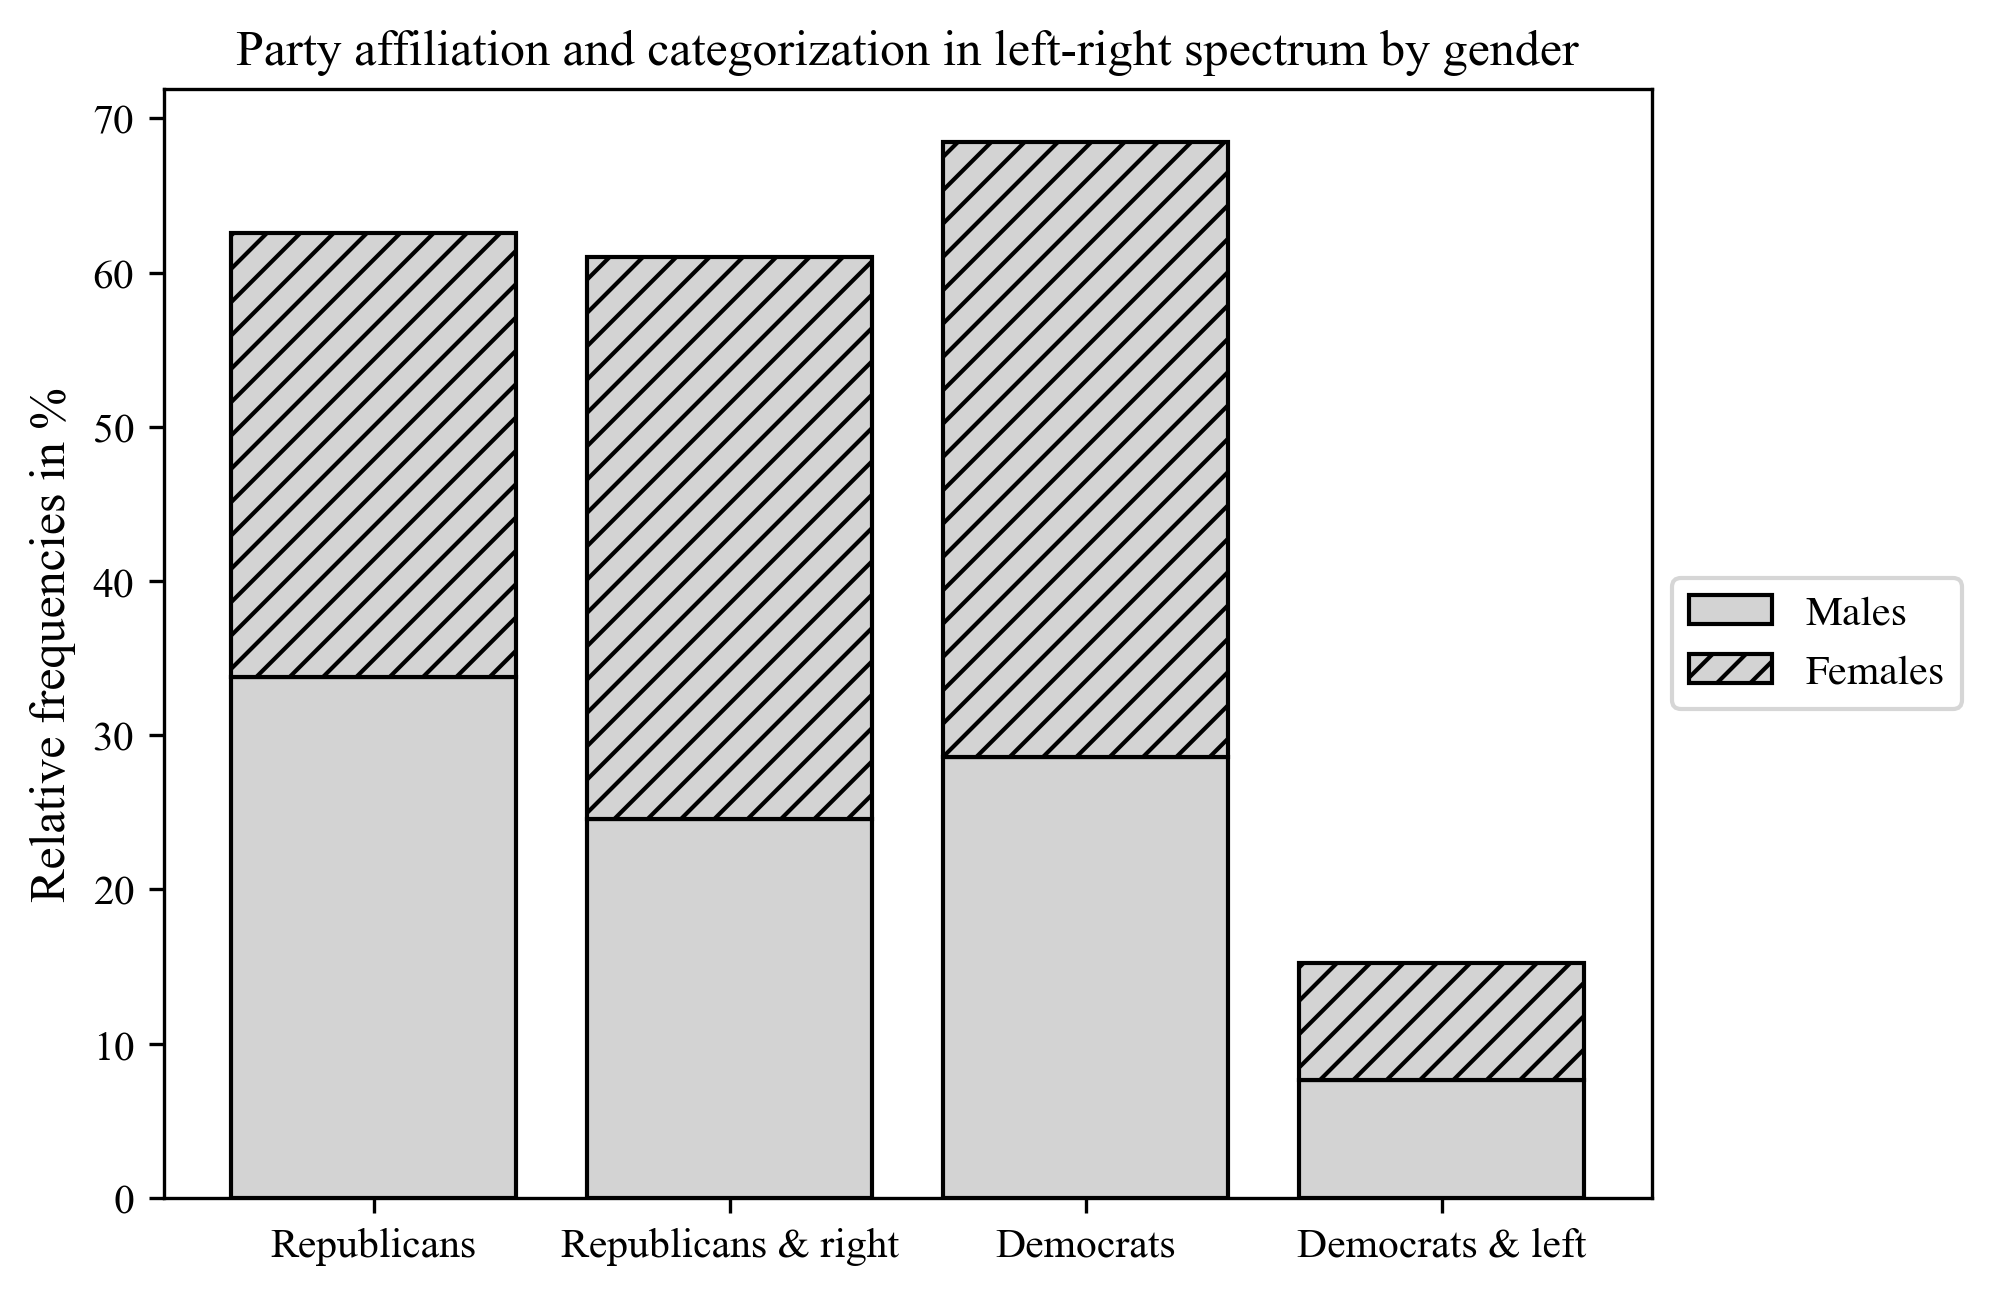

In [331]:
## Visualization 

import matplotlib as mpl

# defining variables on x and y axis
x  = ['Republicans','Republicans & right','Democrats', 'Democrats & left']
y1 = [round((mal_rep/males)*100,2),round((mal_rr/mal_rep)*100,2),round((mal_dem/males)*100,2),round((mal_ll/mal_dem)*100,2)]   # males who are Republicans/Democrats + and classify them as right/left
y2 = [round((fem_rep/females)*100,2),round((fem_rr/fem_rep)*100,2),round((fem_dem/females)*100,2),round((mal_ll/mal_dem)*100,2)] # females who are Republicans/Democrats + and classify them as right/left

# plot stacked bars
plt.bar(x, y1, color='lightgrey', edgecolor='black')
plt.bar(x, y2, bottom=y1, color='lightgrey', hatch= "///", edgecolor='black')

#plt.xlabel("Variables", fontsize=12)
plt.ylabel("Relative frequencies in %", fontsize=12)

# Names for categories
plt.legend(["Males", "Females"],prop={'family':"Times", 'size':10}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Party affiliation and categorization in left-right spectrum by gender")

#set font globally to TNR
plt.rcParams["font.family"] = "Times New Roman"

#upscale graph quality
mpl.rcParams['figure.dpi'] = 300
    



#### Exploring categories of variables

In [32]:
import pprint
 
counter_dict = {'pol_know_pre': 0, 'pol_know_post': 0, 'interest': 0, 'gen_know': 0}

# Map values in signif_p to the appropriate counter variable using a case statement
for i in signif_p:
    if i in pol_know_pre:
        counter_dict['pol_know_pre'] += 1
    elif i in pol_know_post:
        counter_dict['pol_know_post'] += 1
    elif i in interest:
        counter_dict['interest'] += 1
    elif i in gen_know:
        counter_dict['gen_know'] += 1


display(counter_dict)

# creating a relative dictionary which uses the counts from the previous dictionary and calculates the relative numbers 
# by dividing though the total number of variables within each category.
relative_dict = counter_dict

# creating a dictionary which contains the lengths of each categories list.
len_dict = {'pol_know_pre': len(pol_know_pre), 'pol_know_post': len(pol_know_post), 'interest': len(interest), 'gen_know': len(gen_know)}
display(len_dict)

# looping trough each category and calculatinf the relative occurence of variables within the category
for key in relative_dict:
    relative_dict[key] = round(counter_dict[key]/len_dict[key],3)

# Prints the nicely formatted dictionary (sorts keys values in ascending order)
pprint.pprint(relative_dict)


{'pol_know_pre': 9, 'pol_know_post': 3, 'interest': 3, 'gen_know': 6}

{'pol_know_pre': 12, 'pol_know_post': 7, 'interest': 5, 'gen_know': 18}

{'gen_know': 0.333,
 'interest': 0.6,
 'pol_know_post': 0.429,
 'pol_know_pre': 0.75}


In [33]:
### Nicer print for Thesis report
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Category", "Relative frequency of significant variables within category"]

# sort dictionary by values in descending order
sorted_dict = dict(sorted(relative_dict.items(), key=lambda x: x[1], reverse=True))


for key, value in sorted_dict.items():
    table.add_row([key, value])

display(table)
print()

Category,Relative frequency of significant variables within category
pol_know_pre,0.75
interest,0.6
pol_know_post,0.429
gen_know,0.333


we can see that from the 'pol_know_pre' category, 75 percent of all variables are significant.

### Analyzing DK answers 

In [174]:
# defining answers which fall under the DK category
DK = ["3. I'm not sure", "-8. Don't know", "-9. Refused"]
DK_count = 0
DK_count_signif = 0 
DK_females = 0
DK_males = 0
DK_vars = []

# looping through all variables
for var in pol_variables:
    # get answer options of variable
    counts = {}
    for key in meta.variable_value_labels[var]:
        answer = meta.variable_value_labels[var][key]
   
        if answer in DK: 
            DK_count+=1
            DK_vars.append(var)
            variable_df['DK_option'][var] = True
            counts[key] = df[var].value_counts().get(key, 0)
            table = []
            p_val = False
            for k in counts:
                total_count = counts[k]
                total_count_percent = counts[k]/df[var].count()
                total_male = (df['gender'] == 1).sum()
                total_female = (df['gender'] == 2).sum()
                observed_male = ((df['gender'] == 1) & (df[var] == int(k))).sum()
                observed_female = ((df['gender'] == 2) & (df[var] == int(k))).sum()
                expected_male = (df['gender'] == 1).sum() * total_count_percent
                expected_female = (df['gender'] == 2).sum() * total_count_percent
                

                # calculate chi-squared test statistic and p-value
                obs = np.array([observed_male, observed_female])
                exp = np.array([expected_male, expected_female])
                # note: this is for one answer item of one question, so the degree of freedom is 1
                chi2, pval = stats.chisquare(obs, exp)

                # selecting only those questions in which the p-value is significant
                if pval < 0.05:
                    p_val = True
                    entry = [k, total_count, total_count_percent, observed_male, observed_female, expected_male, expected_female, pval, chi2]
                    table.append(entry)

            if p_val == True: 
                print("Question ID:", var)
                print("Question text:", meta.column_names_to_labels[var])
                # count the amount of questions which include DK answers
                DK_count_signif+=1
                
                html_table = tabulate(table, headers=['Answer Key', 'Total Count', 'Expected %', 'Observed Male', 'Observed Female', 'Expected Male', 'Expected Female', 'Chi squared p-value', 'chi squared'], tablefmt='html')
                # Display the HTML table using the IPython.display module
                display(HTML(html_table))
            
                
                # if females chose DK more than expected
                if (expected_male < observed_male) & (expected_female > observed_female):
                    print("Males chose DK more than expected.")
                    print()
                    DK_males+=1
                    variable_df['DK_higher_choice'][var] = 1
                
                if (expected_female < observed_female) & (expected_male > observed_male):
                    print("Females chose DK more than expected.")
                    print()
                    DK_females+=1
                    variable_df['DK_higher_choice'][var] = 2
                 
                
            
print("DK count:",DK_count)
print("significant DKs: ", DK_count_signif)



Question ID: V201202
Question text: PRE: 7pt scale liberal-conservative: Democratic Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,29,62,41.694,49.306,0.0075682,7.13291


Females chose DK more than expected.

Question ID: V201202
Question text: PRE: 7pt scale liberal-conservative: Democratic Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,29,62,41.694,49.306,0.0075682,7.13291


Females chose DK more than expected.

Question ID: V201203
Question text: PRE: 7pt scale liberal-conservative: Republican Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,166,0.0202119,62,104,76.0572,89.9428,0.0285403,4.79513


Females chose DK more than expected.

Question ID: V201203
Question text: PRE: 7pt scale liberal-conservative: Republican Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,166,0.0202119,62,104,76.0572,89.9428,0.0285403,4.79513


Females chose DK more than expected.

Question ID: V201206
Question text: PRE: 7pt scale liberal-conservative: Democratic party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,85,0.0103494,26,59,38.945,46.055,0.00483188,7.94131


Females chose DK more than expected.

Question ID: V201206
Question text: PRE: 7pt scale liberal-conservative: Democratic party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,85,0.0103494,26,59,38.945,46.055,0.00483188,7.94131


Females chose DK more than expected.

Question ID: V201207
Question text: PRE: 7pt scale liberal-conservative: Republican party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,104,0.0126629,30,74,47.6503,56.3497,0.000513364,12.0665


Females chose DK more than expected.

Question ID: V201207
Question text: PRE: 7pt scale liberal-conservative: Republican party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,104,0.0126629,30,74,47.6503,56.3497,0.000513364,12.0665


Females chose DK more than expected.

Question ID: V201247
Question text: PRE: 7pt scale spending & services: Democratic Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,29,62,41.694,49.306,0.0075682,7.13291


Females chose DK more than expected.

Question ID: V201247
Question text: PRE: 7pt scale spending & services: Democratic Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,29,62,41.694,49.306,0.0075682,7.13291


Females chose DK more than expected.

Question ID: V201248
Question text: PRE: 7pt scale spending & services: Republican Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,84,0.0102277,27,57,38.4868,45.5132,0.0118884,6.32743


Females chose DK more than expected.

Question ID: V201248
Question text: PRE: 7pt scale spending & services: Republican Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,84,0.0102277,27,57,38.4868,45.5132,0.0118884,6.32743


Females chose DK more than expected.

Question ID: V201250
Question text: PRE: 7pt scale defense spending: Democratic Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,31,85,53.1484,62.8516,3.6701e-05,17.0348


Females chose DK more than expected.

Question ID: V201250
Question text: PRE: 7pt scale defense spending: Democratic Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,31,85,53.1484,62.8516,3.6701e-05,17.0348


Females chose DK more than expected.

Question ID: V201251
Question text: PRE: 7pt scale defense spending: Republican Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,23,68,41.694,49.306,8.38518e-05,15.4694


Females chose DK more than expected.

Question ID: V201251
Question text: PRE: 7pt scale defense spending: Republican Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,23,68,41.694,49.306,8.38518e-05,15.4694


Females chose DK more than expected.

Question ID: V201253
Question text: PRE: 7pt scale gov-private medical insurance scale: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,101,0.0122976,26,75,46.2758,54.7242,5.13881e-05,16.3962


Females chose DK more than expected.

Question ID: V201253
Question text: PRE: 7pt scale gov-private medical insurance scale: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,101,0.0122976,26,75,46.2758,54.7242,5.13881e-05,16.3962


Females chose DK more than expected.

Question ID: V201254
Question text: PRE: 7pt scale gov-private medical insurance scale: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,89,0.0108365,25,64,40.7777,48.2223,0.000789006,11.2669


Females chose DK more than expected.

Question ID: V201254
Question text: PRE: 7pt scale gov-private medical insurance scale: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,89,0.0108365,25,64,40.7777,48.2223,0.000789006,11.2669


Females chose DK more than expected.

Question ID: V201256
Question text: PRE: 7pt scale guaranteed job-income scale: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,96,0.0116888,30,66,43.9849,52.0151,0.0041741,8.20648


Females chose DK more than expected.

Question ID: V201256
Question text: PRE: 7pt scale guaranteed job-income scale: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,96,0.0116888,30,66,43.9849,52.0151,0.0041741,8.20648


Females chose DK more than expected.

Question ID: V201257
Question text: PRE: 7pt scale guaranteed job-income scale: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,86,0.0104712,30,56,39.4031,46.5969,0.0418443,4.14149


Females chose DK more than expected.

Question ID: V201257
Question text: PRE: 7pt scale guaranteed job-income scale: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,86,0.0104712,30,56,39.4031,46.5969,0.0418443,4.14149


Females chose DK more than expected.

Question ID: V201259
Question text: PRE: 7pt scale gov assistance to blacks scale: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,98,0.0119323,30,68,44.9013,53.0987,0.00251862,9.12702


Females chose DK more than expected.

Question ID: V201259
Question text: PRE: 7pt scale gov assistance to blacks scale: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,98,0.0119323,30,68,44.9013,53.0987,0.00251862,9.12702
-8,15,0.00182637,1,14,6.87264,8.12736,0.00234011,9.26158


Females chose DK more than expected.

Question ID: V201260
Question text: PRE: 7pt scale gov assistance to blacks scale: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,27,64,41.694,49.306,0.00199122,9.55761


Females chose DK more than expected.

Question ID: V201260
Question text: PRE: 7pt scale gov assistance to blacks scale: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,91,0.01108,27,64,41.694,49.306,0.00199122,9.55761


Females chose DK more than expected.

Question ID: V201263
Question text: PRE: 7pt scale environment-business tradeoff: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,123,0.0149763,35,88,56.3557,66.6443,0.000111229,14.9359


Females chose DK more than expected.

Question ID: V201263
Question text: PRE: 7pt scale environment-business tradeoff: Dem Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,123,0.0149763,35,88,56.3557,66.6443,0.000111229,14.9359
-8,26,0.00316571,5,21,11.9126,14.0874,0.006511,7.40314


Females chose DK more than expected.

Question ID: V201264
Question text: PRE: 7pt scale environment-business tradeoff: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,106,0.0129064,33,73,48.5667,57.4333,0.00240878,9.20862


Females chose DK more than expected.

Question ID: V201264
Question text: PRE: 7pt scale environment-business tradeoff: Rep Presidential candidate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,106,0.0129064,33,73,48.5667,57.4333,0.00240878,9.20862
-8,15,0.00182637,2,13,6.87264,8.12736,0.0115675,6.37598


Females chose DK more than expected.

Question ID: V201338
Question text: PRE: STD Abortion: Democratic Presidential candidate placement


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,221,0.0269086,80,141,101.257,119.743,0.00410671,8.23602


Females chose DK more than expected.

Question ID: V201338
Question text: PRE: STD Abortion: Democratic Presidential candidate placement


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,221,0.0269086,80,141,101.257,119.743,0.00410671,8.23602


Females chose DK more than expected.

Question ID: V201339
Question text: PRE: STD Abortion: Republican Presidential candidate placement


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,213,0.0259345,83,130,97.5915,115.408,0.0447903,4.02652


Females chose DK more than expected.

Question ID: V201339
Question text: PRE: STD Abortion: Republican Presidential candidate placement


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,213,0.0259345,83,130,97.5915,115.408,0.0447903,4.02652


Females chose DK more than expected.

Question ID: V201383
Question text: PRE: Did Trump ask Ukraine to investigate rivals


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
3,3687,0.448922,1515,2172,1689.3,1997.7,8.35806e-09,33.19


Females chose DK more than expected.

Question ID: V201397
Question text: PRE: Income gap today more or less than 20 years ago


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,46,0.00560088,14,32,21.0761,24.9239,0.036263,4.38469


Females chose DK more than expected.

Question ID: V201397
Question text: PRE: Income gap today more or less than 20 years ago


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,46,0.00560088,14,32,21.0761,24.9239,0.036263,4.38469


Females chose DK more than expected.

Question ID: V201603
Question text: PRE: Political violence compared to 4 years ago


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,78,0.00949714,21,57,35.7377,42.2623,0.00081052,11.217


Females chose DK more than expected.

Question ID: V201645
Question text: PRE: On which program does Federal government spend the least


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,36,80,53.1484,62.8516,0.00139549,10.2117


Females chose DK more than expected.

Question ID: V201646
Question text: PRE: Party with most members in House before election


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,88,0.0107147,24,64,40.3195,47.6805,0.000480201,12.191


Females chose DK more than expected.

Question ID: V201647
Question text: PRE: Party with most members in Senate before election


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,94,0.0114453,25,69,43.0685,50.9315,0.000183753,13.9903


Females chose DK more than expected.

Question ID: V202217
Question text: POST: Is one of the parties more conservative than the other


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,30,0.00365275,8,22,13.7453,16.2547,0.0352688,4.43211


Females chose DK more than expected.

Question ID: V202217
Question text: POST: Is one of the parties more conservative than the other


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,30,0.00365275,8,22,13.7453,16.2547,0.0352688,4.43211


Females chose DK more than expected.

Question ID: V202218
Question text: POST: Which is the party that is more conservative


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,16,0.00194813,3,13,7.33082,8.66918,0.0297785,4.72203


Females chose DK more than expected.

Question ID: V202218
Question text: POST: Which is the party that is more conservative


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,16,0.00194813,3,13,7.33082,8.66918,0.0297785,4.72203


Females chose DK more than expected.

Question ID: V202437
Question text: POST: CSES5-Q17a: Left-right-Democratic Party


/Users/laurastritzel/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:7160: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,37,79,53.1484,62.8516,0.00261908,9.05548


Females chose DK more than expected.

Question ID: V202437
Question text: POST: CSES5-Q17a: Left-right-Democratic Party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,116,0.0141239,37,79,53.1484,62.8516,0.00261908,9.05548
-8,18,0.00219165,4,14,8.24717,9.75283,0.0445185,4.03679


Females chose DK more than expected.

Question ID: V202438
Question text: POST: CSES5-Q17b: Left-right-Republican Party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,119,0.0144892,38,81,54.523,64.477,0.00236604,9.2414


Females chose DK more than expected.

Question ID: V202438
Question text: POST: CSES5-Q17b: Left-right-Republican Party


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,119,0.0144892,38,81,54.523,64.477,0.00236604,9.2414
-8,19,0.00231341,4,15,8.70535,10.2947,0.0302689,4.69395


Females chose DK more than expected.

Question ID: V202548
Question text: POST: What is the current unemployment rate


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,120,0.014611,32,88,54.9811,65.0189,2.54787e-05,17.7285


Females chose DK more than expected.

Question ID: V202549
Question text: POST: Did Russia try to interfere in 2016 presidential election or not


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,68,0.00827956,20,48,31.156,36.844,0.00662284,7.37251


Females chose DK more than expected.

Question ID: V202551
Question text: POST: Did Trump administration deport more immigrants or did Obama


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,129,0.0157068,41,88,59.1047,69.8953,0.00137774,10.2354


Females chose DK more than expected.

Question ID: V202555
Question text: POST: Have world temperatuers have risen on average or last 100 years or not


Answer Key,Total Count,Expected %,Observed Male,Observed Female,Expected Male,Expected Female,Chi squared p-value,chi squared
-9,50,0.00608791,14,36,22.9088,27.0912,0.0114501,6.39408


Females chose DK more than expected.

DK count: 89
significant DKs:  55


In [175]:
display(variable_df)

,category,significant,better_performance,DK_option,DK_higher_choice
V201005,interest,True,NaN,True,NaN
V201006,interest,True,NaN,True,NaN
V201200,pol_know_scales,True,NaN,True,NaN
V201202,pol_know_scales,True,NaN,True,2
V201203,pol_know_scales,True,NaN,True,2
...,...,...,...,...,...
V202556,gen_know,True,NaN,False,NaN
V202557,gen_know,False,NaN,True,NaN
V202558,gen_know,False,NaN,False,NaN
V202559,gen_know,False,NaN,True,NaN


In [177]:
# using the variable_df to extract numbers of significant and insignificant variables (according to chi-squared test)
variable_df.significant.value_counts()

True     39
False    22
Name: significant, dtype: int64

In [178]:
print("Within all considered variables, there are ", DK_count, "DK answer options.")

Within all considered variables, there are  89 DK answer options.


In [179]:
print(DK_count_signif, "out of ", len(pol_variables), "questions include DK answer options which have significant p-values.")


55 out of  61 questions include DK answer options which have significant p-values.


In [340]:
print(DK_females)
print(DK_males)

55
0


55 questions include DK type answer options. All of those show that women chose these options more than males.

In [341]:
print(round((DK_count_signif/len(pol_variables))*100,2), "percent of all questions include DK answer options which have significant p-values.")

90.16 percent of all questions include DK answer options which have significant p-values.


In [180]:
# these are all variables which include DK answer options
print(DK_vars)

['V201005', 'V201006', 'V201200', 'V201200', 'V201202', 'V201202', 'V201203', 'V201203', 'V201204', 'V201204', 'V201205', 'V201205', 'V201206', 'V201206', 'V201207', 'V201207', 'V201216', 'V201216', 'V201247', 'V201247', 'V201248', 'V201248', 'V201250', 'V201250', 'V201251', 'V201251', 'V201253', 'V201253', 'V201254', 'V201254', 'V201256', 'V201256', 'V201257', 'V201257', 'V201259', 'V201259', 'V201260', 'V201260', 'V201263', 'V201263', 'V201264', 'V201264', 'V201338', 'V201338', 'V201339', 'V201339', 'V201363', 'V201363', 'V201364', 'V201364', 'V201380', 'V201380', 'V201381', 'V201383', 'V201383', 'V201383', 'V201397', 'V201397', 'V201398', 'V201399', 'V201603', 'V201604', 'V201641', 'V201645', 'V201646', 'V201647', 'V202135', 'V202137', 'V202216', 'V202216', 'V202217', 'V202217', 'V202218', 'V202218', 'V202406', 'V202406', 'V202407', 'V202407', 'V202437', 'V202437', 'V202438', 'V202438', 'V202548', 'V202549', 'V202551', 'V202553', 'V202555', 'V202557', 'V202559']


In [276]:
# extract all variables which indicate correct answer option
correct_variables = []

for i in variable_df.index:
    if variable_df["better_performance"][i] == True:
        correct_variables.append(i)
        
print(correct_variables)

['V201645', 'V201646', 'V201647', 'V202548']


In [285]:
frequencies = {
    'Males':[],
    'Females':[]
}

for var in correct_variables:
    # get answer options of variable
    counts = {}
    for key in meta.variable_value_labels[var]:
        answer = meta.variable_value_labels[var][key]
        
        # checking for correct answer, to add to counts dictionary
        if 'correct' in answer: 
            counts[key] = df[var].value_counts().get(key, 0)
            table = []
            p_val = False
            
            for k in counts:
                total_count = counts[k]
                total_count_percent = counts[k]/df[var].count()
                total_male = (df['gender'] == 1).sum()
                total_female = (df['gender'] == 2).sum()
                observed_male = ((df['gender'] == 1) & (df[var] == int(k))).sum()
                observed_female = ((df['gender'] == 2) & (df[var] == int(k))).sum()
                expected_male = (df['gender'] == 1).sum() * total_count_percent
                expected_female = (df['gender'] == 2).sum() * total_count_percent
                
                # updating the observed frequencies in the frequencies dictionary by dividing the observed number of males though the total number of males. 
                # multiplying by 100 to get percentages
                frequencies["Males"].append(round((observed_male/males)*100,2))
                frequencies["Females"].append(round((observed_female/females)*100,2))


display(frequencies)


{'Males': [42.84, 74.22, 81.64, 35.13], 'Females': [32.02, 61.1, 72.58, 31.82]}

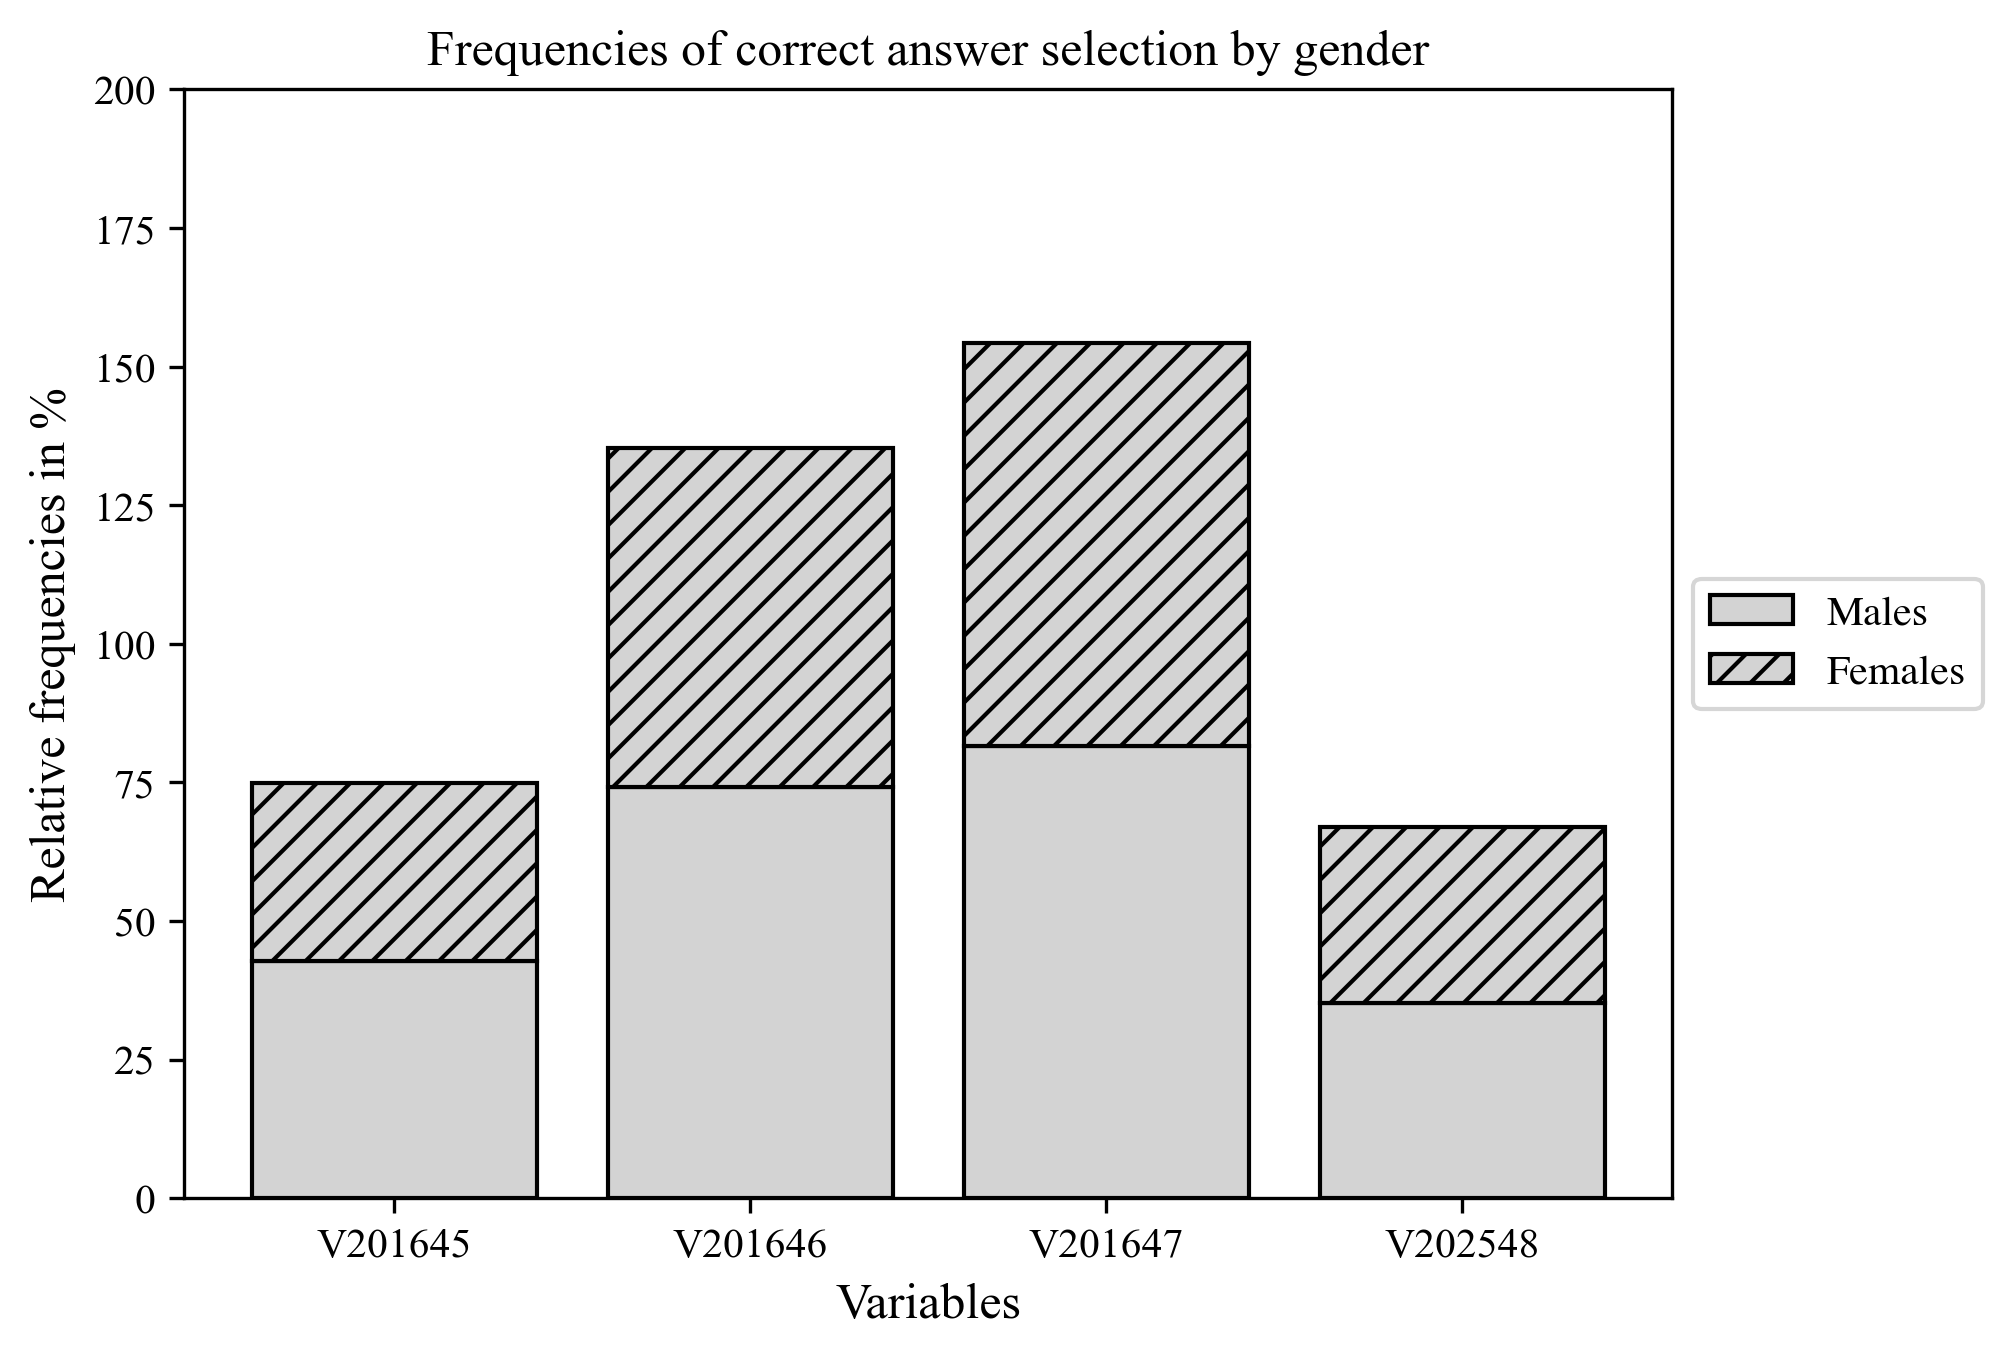

In [299]:
## Visualization 1

import matplotlib as mpl

# defining variables on x and y axis
x = correct_variables
y1 = frequencies["Males"]   # males who answered correctly
y2 = frequencies["Females"] # females who answered correctly

# plot stacked bars
plt.bar(x, y1, color='lightgrey', edgecolor='black')
plt.bar(x, y2, bottom=y1, color='lightgrey', hatch= "///", edgecolor='black')

plt.xlabel("Variables", fontsize=12)
plt.ylabel("Relative frequencies in %", fontsize=12)
# Names for categories
plt.legend(["Males", "Females"],prop={'family':"Times", 'size':10}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Frequencies of correct answer selection by gender")
# set limits for y axis
plt.ylim([0,max_value])
#set font globally to TNR
plt.rcParams["font.family"] = "Times New Roman"
#upscale graph quality
mpl.rcParams['figure.dpi'] = 300
    



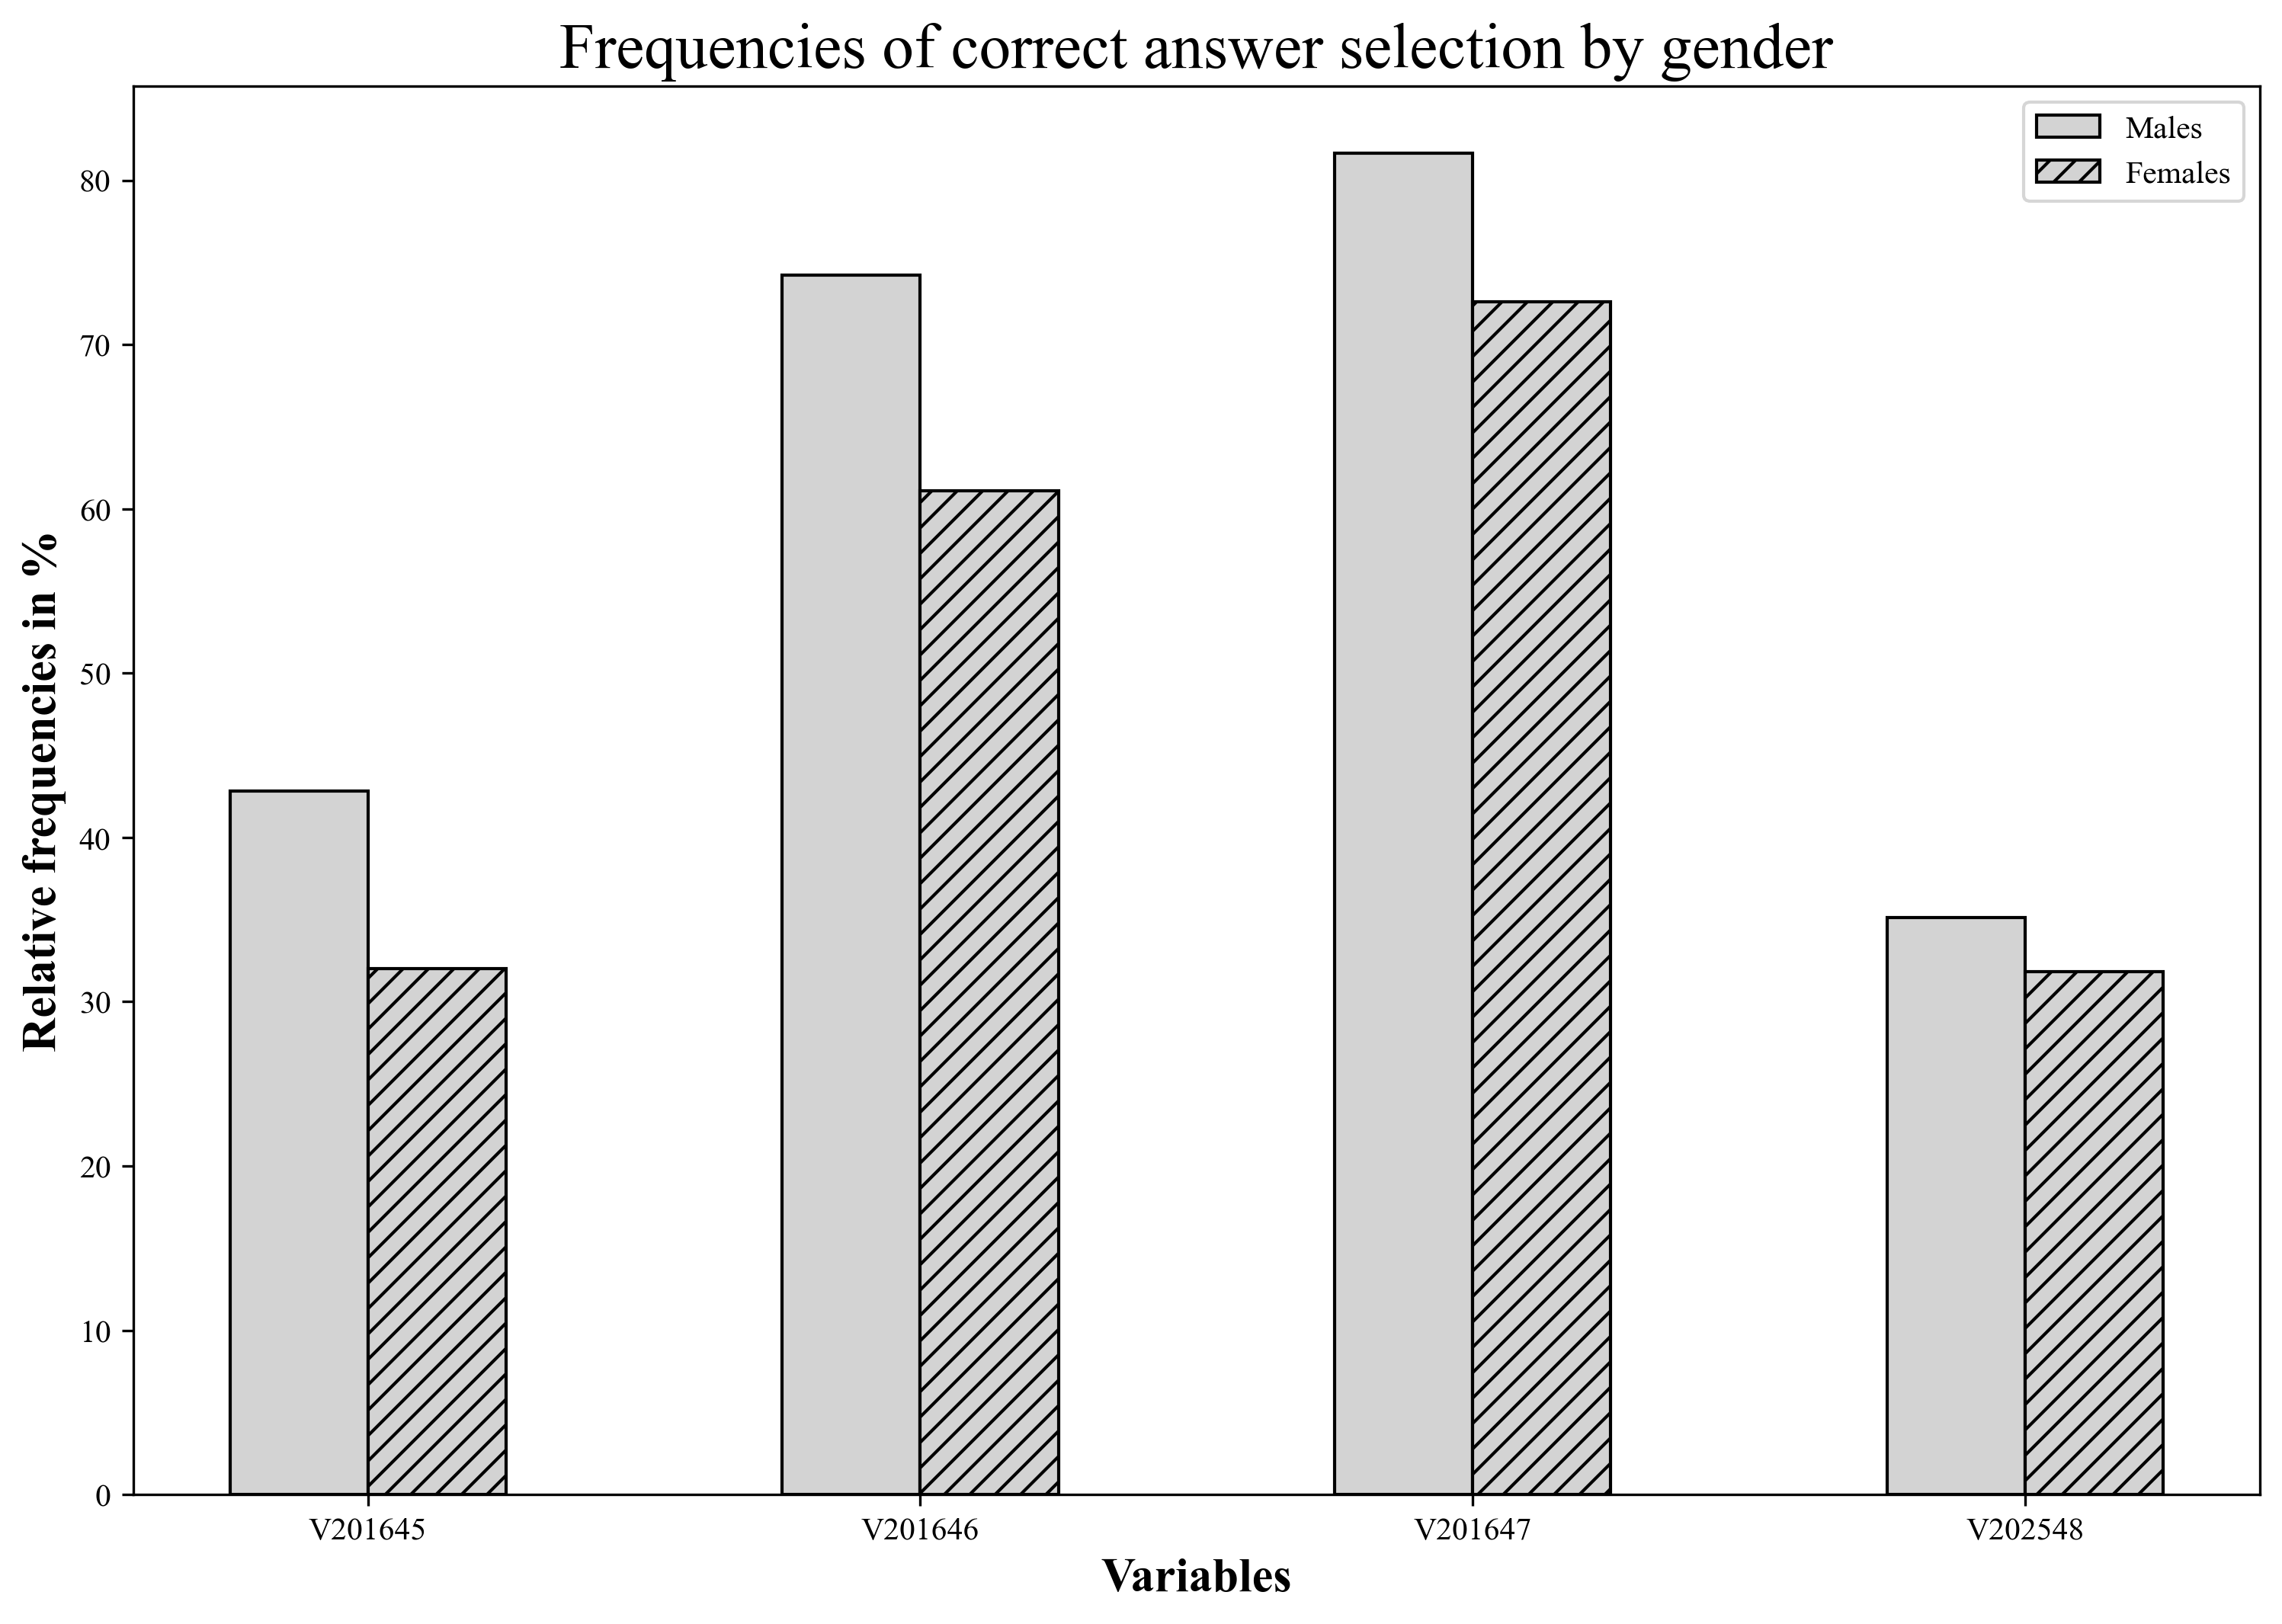

In [325]:
## Visualization 2

# set bar width
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# y axis elements
y1 = frequencies["Males"]   # males who answered correctly
y2 = frequencies["Females"] # females who answered correctly

# determine position of bar on X axis
b1 = np.arange(len(y1))
b2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(b1, y1, color ='lightgrey', width = barWidth, edgecolor ='black', label ='Males')
plt.bar(b2, y2,  color='lightgrey', hatch= "///", width = barWidth, edgecolor ='black', label ='Females')
plt.xlabel('Variables', fontweight ='bold', fontsize = 15)
plt.ylabel("Relative frequencies in %", fontweight ='bold', fontsize = 15)
plt.title("Frequencies of correct answer selection by gender").set_size(20)
plt.xticks([r + (barWidth/2) for r in range(len(y1))], correct_variables)
plt.legend()
plt.savefig('Answer_freq.png')
plt.show()

## Predictive Modeling: Gender classifier

### DECISION TREE

I trained a decision tree based classifier which predicts the target value 'gender' on the basis of those questions which were found to be significant in the previous sections. 

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# set features and targets. Features are X, all significant variables. Target is the gender variable.
X = df[signif_p] 
y = df['gender']


In [182]:
# Splitting the data into training and testing (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict the gender with test data
y_pred = dt_classifier.predict(X_test)

# Print the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score of decision tree classifier: {accuracy}")

Accuracy score of decision tree classifier: 0.5355404089581305


In [183]:
## train classification tree

import matplotlib.pyplot as plt
from sklearn import tree

def trained_class_tree(max_dep, min_split, min_leaf, crite, split):
    # Split the data into training and testing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # Initialize the decision tree classifier
    dt_classifier = DecisionTreeClassifier(random_state=42, 
                                           max_depth= max_dep , min_samples_split=min_split, 
                                           min_samples_leaf=min_leaf, criterion=crite, splitter=split) 
    # Train the decision tree classifier
    dt_classifier.fit(X_train, y_train)
    # Predict the target values on test data
    y_pred = dt_classifier.predict(X_test)
    # Print the accuracy score of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy score of decision tree classifier: {accuracy}")
    
    # defining feature names
    fn=signif_p
    # defining class names
    cn = ['male','female']

    # plotting tree 
    fig, axes = plt.subplots(figsize = (20,20), dpi=300)
    tree.plot_tree(dt_classifier,
               feature_names = fn, # includes feature names
               class_names=cn, # includes class labels
               filled = True);
    

#### Grid search

In [184]:
from sklearn.model_selection import GridSearchCV, train_test_split

# set features and targets. Features are X, all significant variables. Target is the gender variable.
X = df[signif_p] 
y = df['gender']

# Define hyperparameter grid
param_grid = {
    # measuring quality of a split (default = gini)
    'criterion': ['gini', 'entropy'],
    # strategy used for splitting a node (default = best)
    'splitter': ['best', 'random'],
    # max tree depth (at least 2)
    'max_depth': [3, 4, 5, 6],
    # minimum samples for splitting a decision node
    'min_samples_split': [10, 20, 30, 40, 50],
    # minimum samples for allowing a new leaf
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
# Perform grid search with cross-validation (5-fold)
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid=param_grid, cv=5) 
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get best decision tree classifier model (already trained!)
best_dtc = grid_search.best_estimator_ 

# Evaluate best model on test set
accuracy = best_dtc.score(X_test, y_test)
print("Accuracy on test set:", accuracy) # if test set accuracy is higher than train accuacy its nice

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 10, 'splitter': 'best'}
Best score: 0.5879201525525651
Accuracy on test set: 0.5900681596884129


Accuracy score of decision tree classifier: 0.5900681596884129


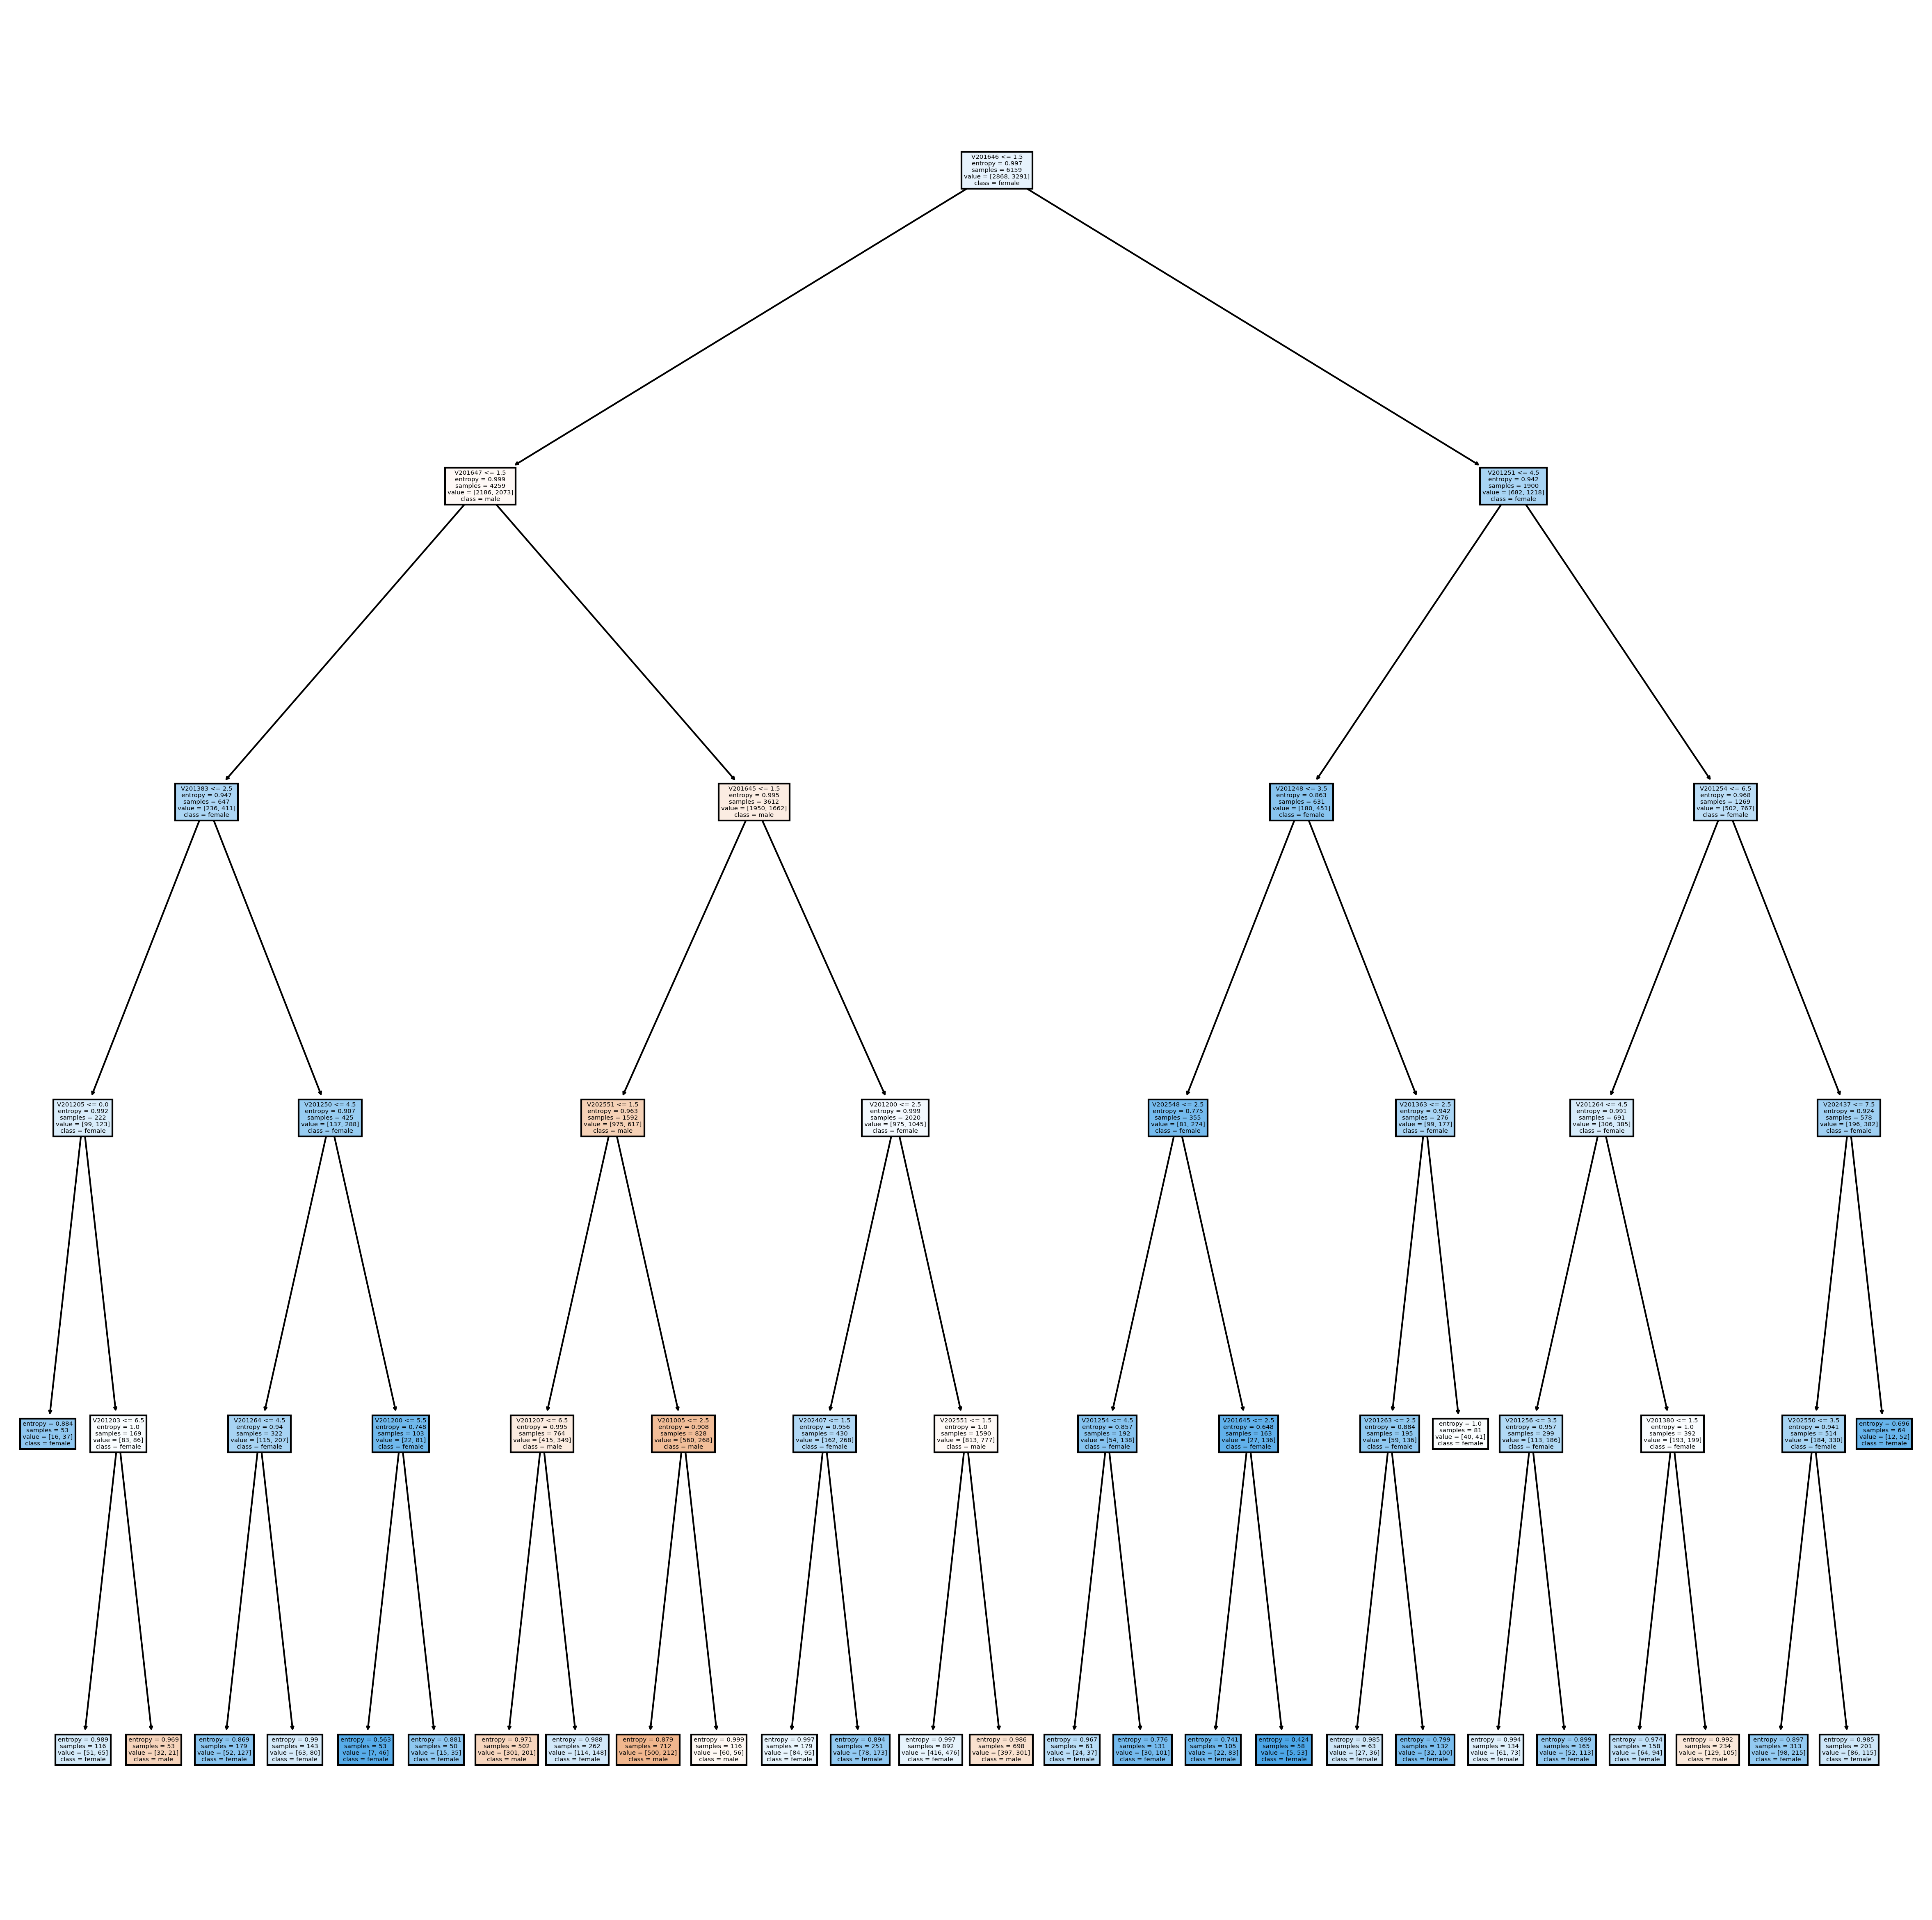

In [185]:
### resulting decision tree on the basis of best hyperparameters
# trained_class_tree(max_dep, min_split, min_leaf, crite, split)
trained_class_tree(5, 10,50, 'entropy', 'best')

### RANDOM FOREST

In [186]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
score = rf.score(X_test, y_test)
print("Random Forest test set score: {:.2f}".format(score))

Random Forest test set score: 0.62


#### Grid search

In [349]:
# Define the parameter grid for the grid search
param_grid = {
    # number of trees used
    'n_estimators': [50, 100, 150],
    # max tree depth (at least 2)
    'max_depth': [3, 4, 5, 6],
    # minimum samples for splitting a decision node
    'min_samples_split': [10, 20, 30, 40, 50],
    # minimum samples for allowing a new leaf
    'min_samples_leaf': [10, 20, 30, 40, 50]
}

# Create a Random Forest classifier and perform a grid search with 5 fold cross validation
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and score from the grid search
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 50, 'n_estimators': 50}
Best score: 0.62


In [187]:
# Train a Random Forest classifier on basis of best hyperparameters
rf = RandomForestClassifier(n_estimators=50, random_state=42,max_depth=6,min_samples_split=50, min_samples_leaf=20)
rf.fit(X_train, y_train)

# Evaluate the model on the test set
score = rf.score(X_test, y_test)
print("Random Forest test set score: {:.2f}".format(score))

Random Forest test set score: 0.62


### Usage for gender prediction

In [188]:
# Make predictions for the test set
y_pred = rf.predict(X_test)

# View accuracy score
accuracy_score(y_test, y_pred)


0.6178188899707887

In [189]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[408 487]
 [298 861]]


In [357]:
from sklearn.metrics import classification_report

# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.58      0.46      0.51       895
           2       0.64      0.74      0.69      1159

    accuracy                           0.62      2054
   macro avg       0.61      0.60      0.60      2054
weighted avg       0.61      0.62      0.61      2054

